<h2>Банки — Сегментация пользователей по потреблению</h2>
<b>Задача:</b><br>
Последние месяцы банк терпит поражение в борьбе за клиентов, они обратились к нам, чтобы  мы нашли потенциальные сегменты, на которые нужно воздействовать, чтобы снизить отток<br>

Предоставленные данные:<br>

Датасет bank_scrooge.csv содержит данные о клиентах банка «Метанпром». Банк располагается в
Ярославле и областных городах: Ростов Великий и Рыбинск.<br>

Колонки:
<li>USERID — идентификатор пользователя,
<li>score — баллы кредитного скоринга (внешние данные, не принадлежащие банку, мы не знаем, как они высчитываются),
<li>city — город,
<li>gender — пол,
<li>age — возраст,
<li>equity — количество баллов собственности (не единиц собственности!)
<li>balance — баланс на счёте,
<li>products — количество продуктов банка, которыми пользуется клиент,
<li>credit_card — есть ли кредитная карта среди продуктов, которые использует клиент
<li>last_activity — активный клиент,
<li>EST_SALARY — оценочный доход клиента,
<li>сhurn — признак оттока.


Ссылка на новую финальную презентацию
https://disk.yandex.ru/i/xs7yQ_HESsFW_Q

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid lightblue 2px; padding: 20px"> <b>Презентация обновлена</b><br>
</div>

Согласованная с заказчиком декомпозиция задачи:

<h4>Загрузка данных и подготовка к исследованию</h4>
    <li>Загрузить имеющиеся данные (bank_scrooge.csv)
    <li>Провести предобработку данных: проверка пропусков, выдвижении гипотез о появлении пропусков и их обработка, дубликатов, ошибок записи, исправить неверные или неподходящие типы данных
<h4>Исследовательский анализ данных</h4>
    <li> Вычислить средние и стандартные отклонения
    <li> Посчитать средние значения по группам ушедших в отток и оставшихся 
    <li> Построить гистограммы распределения признаков
    <li> Построить матрицу корреляций
    <li> Разделить пользователей на основе данных о количестве потребляемых продуктов, исследовать отличительные черты получившихся групп (средние и распределения признаков). Посчитать долю оттока по сегментам.
    <li> Описать портреты типичных клиентов и сравнить их    
<h4>Проверка статистических гипотез</h4>
    <li> Сформулировать статистические гипотезы (нулевая и альтернативная)
    <li> Выбрать и обосновать статистический критерий
    <li> Выполнить проверку гипотез (сформулированных и также предзаданную гипотезу о влиянии возраста на отток по группам)
    <li> Интерпретировать результат
<h4>Промежуточный итог</h4>
    <li>Вычленить ключевые признаки, на основе которых следует строить стратегию воздействия на клиентов в различных сегментах. 
    <li>Сформулировать промежуточный итог
<h4>Сегментация на основе выделенных показателей</h4>
    <li>Найти приоритетные сегменты клиентов
    <li>Посчитать ключевые показатели по этим сегментам
    <li>Выделить приоритетные для работы сегменты клиентов  
<h4>Выводы и рекомендации для заказчика</h4>
    <li>Сделать выводы и написать рекомендации по работе с сегментами клиентов для маркетинга  
    <li>Фиксация конечного результата в формате презентации (pdf)

In [1]:
#импорты библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from scipy import stats as st
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.proportion import proportions_ztest
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from plotly import graph_objects as go
import warnings


<h3>Загрузка данных</h3>

In [2]:
#загружаем данные
data = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')
display(data.head())

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


Загружен датасет длиной 10 тысяч записей;<br>
Колонки:
<li>USERID — идентификатор пользователя, без пропусков, int64 >>проверить на уникальность
<li>score — баллы кредитного скоринга (внешние данные, не принадлежащие банку, мы не знаем, как они высчитываются), без пропусков, float64
<li>city — город, без пропусков, object
<li>gender — пол, без пропусков, object >>трансформировать в бинарное значение
<li>age — возраст, 9974 значения, float64 >>проверить
<li>equity — количество баллов собственности, без пропусков, int64 
<li>balance — баланс на счёте, 7705 значений, float64
<li>products — количество продуктов банка, которыми пользуется клиент, без пропусков, int64
<li>credit_card — есть ли кредитная карта среди продуктов, которые использует клиент, без пропусков, int64
<li>last_activity — активный клиент,  без пропусков, int64
<li>EST_SALARY — оценочный доход клиента,  без пропусков,  float64
<li>сhurn — признак оттока,  без пропусков, int64

<h3>Предобработка данных</h3>

In [4]:
#переименуем колонки
data.columns = data.columns.str.lower()
print(data.columns)

Index(['userid', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn'],
      dtype='object')


In [5]:
#поменяем для удобства дальнейшей работы строковые значения пола на int
#"М" = 1, "Ж" = 0:
data.loc[data['gender']=='М', 'gender'] = 1
data.loc[data['gender']=='Ж','gender'] = 0

#приведем к типу данных int:
data['gender'] = data['gender'].astype(int)

<h4>Обработка дубликатов</h4>

In [6]:
#проверка на полные явные дубликаты
data.duplicated().sum()

0

In [7]:
#посмотрим, насколько userid уникальны
print(len(data['userid'].unique()))

9927


In [8]:
print('Дублирующихся значений в столбце userid:')
print(data['userid'].duplicated().sum())

Дублирующихся значений в столбце userid:
73


In [9]:
ids = data['userid']
data[ids.isin(ids[ids.duplicated()])].sort_values("userid")

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1893,116540,883.0,Рыбинск,0,55.0,1,362756.49,3,0,1,175920.48,1
7694,116540,887.0,Ярославль,0,38.0,0,NaN,1,0,1,119247.61,0
7542,117943,880.0,Ярославль,0,40.0,0,NaN,1,1,0,137718.93,0
4866,117943,855.0,Рыбинск,0,32.0,6,1036832.93,4,1,1,107792.71,1
5896,120258,905.0,Ярославль,1,30.0,0,NaN,1,1,1,146427.96,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2597,226719,990.0,Ярославль,1,37.0,4,14648692.14,2,0,0,934412.61,1
8205,227795,840.0,Рыбинск,1,34.0,2,350768.03,1,1,0,102036.14,1
8497,227795,839.0,Ярославль,1,34.0,2,326593.14,2,1,0,103314.92,0
6457,228075,839.0,Рыбинск,1,39.0,5,507199.85,3,0,1,85195.80,0


In [10]:
duplicates=pd.concat(g for _, g in data.groupby("userid") if len(g) > 1)

In [11]:
print(duplicates)

      userid  score       city  gender   age  equity     balance  products  \
1893  116540  883.0    Рыбинск       0  55.0       1   362756.49         3   
7694  116540  887.0  Ярославль       0  38.0       0         NaN         1   
4866  117943  855.0    Рыбинск       0  32.0       6  1036832.93         4   
7542  117943  880.0  Ярославль       0  40.0       0         NaN         1   
5863  120258  908.0    Рыбинск       0  38.0       4  2213581.63         2   
...      ...    ...        ...     ...   ...     ...         ...       ...   
4216  226719  903.0    Рыбинск       0  63.0       0         NaN         1   
8205  227795  840.0    Рыбинск       1  34.0       2   350768.03         1   
8497  227795  839.0  Ярославль       1  34.0       2   326593.14         2   
1247  228075  932.0  Ярославль       1   NaN       5  7601719.20         2   
6457  228075  839.0    Рыбинск       1  39.0       5   507199.85         3   

      credit_card  last_activity  est_salary  churn  
1893     

Похоже, что userid клиентов банка в Рыбинске и в Ярославле могут дублироваться; судя по записям, это разные люди с разным кредитным скором и имуществом. Оставим их как есть, поскольку остальные данные не повторяются


<h4>Обработка пропусков</h4>

In [12]:
#посчитаем пропуски
data.isna().sum()

userid              0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

Процент пропусков
userid            0.00
score             0.00
city              0.00
gender            0.00
age               0.26
equity            0.00
balance          22.95
products          0.00
credit_card       0.00
last_activity     0.00
est_salary        0.00
churn             0.00
dtype: float64


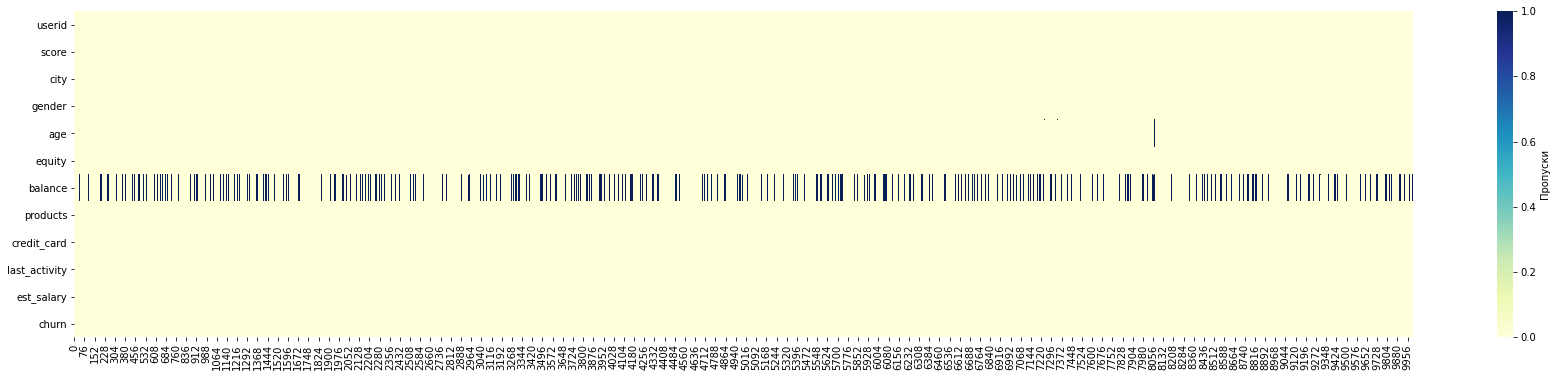

In [13]:
#посмотрим, как они распределяются
plt.figure(figsize=(30,6))
sns.heatmap(data.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Пропуски'});

part = round(data.isna().sum() * 100 / len(data), 2)
print('Процент пропусков')
print(part)

На первый взгляд взаимосвязь в пропусках отсутствует: пропуски распределены относительно равномерно по всей таблице


Процент пропусков
userid            0.00
score             0.00
city              0.00
gender            0.00
age               0.26
equity            0.00
balance          22.95
products          0.00
credit_card       0.00
last_activity     0.00
est_salary        0.00
churn             0.00
dtype: float64


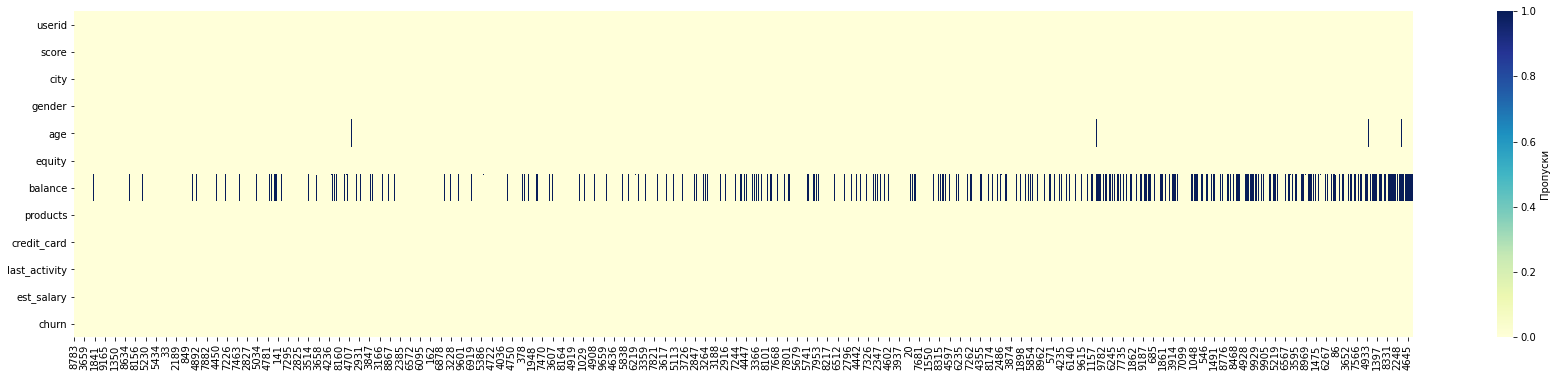

In [14]:
sorted_data = data.sort_values(['est_salary'], ascending= True)
plt.figure(figsize=(30,6))
sns.heatmap(sorted_data.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Пропуски'});

part = round(data.isna().sum() * 100 / len(data), 2)
print('Процент пропусков')
print(part)

Кажется, что с ростом оценочного дохода клиентов растет и количество пропусков по балансу

На этот момент мы:
- загрузили датасет
- привели в порядок названия колонок
- провели проверку на дубликаты
- посчитали пропуски и посмотрели, как они распределены по датасету

Нужно:
- узнать, как сгруппированы пропуски по группам
- попытаться восстановить пропущенные значения или заполнить их так, чтобы не испортить прочие данные (22% - это довольно много)

In [15]:
#посмотрим, как связаны пропуски с группами
fil = data.query('balance.isna()').groupby('city')['city'].count()
print('Пропуски по филиалам',fil)
eq = data.query('balance.isna()').groupby('equity')['equity'].count()
print('Пропуски по баллам собственности',eq)
pr = data.query('balance.isna()').groupby('products')['products'].count()
print('Пропуски по используемым продуктам',pr)
ac = data.query('balance.isna()').groupby('last_activity')['last_activity'].count()
print('Пропуски по последней активности',ac)
cc=data.query('balance.isna()').groupby('credit_card')['credit_card'].count()
print('Пропуски по наличию кредитки',cc)
churn=data.query('balance.isna()').groupby('churn')['churn'].count()
print('Пропуски по признаку оттока',churn)

Пропуски по филиалам city
Ростов        235
Рыбинск       593
Ярославль    1467
Name: city, dtype: int64
Пропуски по баллам собственности equity
0    2180
1     114
3       1
Name: equity, dtype: int64
Пропуски по используемым продуктам products
0       1
1    1950
2     315
3      29
Name: products, dtype: int64
Пропуски по последней активности last_activity
0    1034
1    1261
Name: last_activity, dtype: int64
Пропуски по наличию кредитки credit_card
0     423
1    1872
Name: credit_card, dtype: int64
Пропуски по признаку оттока churn
0    2282
1      13
Name: churn, dtype: int64


Больше всего пропусков в Ярославле, меньше всего - в Ростове, также больше всего пропусков у тех, у кого баллы собственности 0, по используемым продуктам больше всего пропусков по балансу у тех, кто использует 1 банковский продукт, меньше всего - у тех, кто не использует банковские продукты. У отточных клиентов пропусков меньше, чем у неотточных.

In [16]:
#посчитаем все в долях и выведем для наглядности в виде таблицы
missing_data_list = []  # Список для хранения датафреймов по каждой категории

for column in ['city', 'gender', 'credit_card', 'last_activity', 'equity', 'products', 'churn']:
    data_parts = data.groupby(column).agg({'userid': 'count'}).rename(columns={'userid': 'всего'})
    counts = data.groupby(column)['balance'].apply(lambda x: x.isna().sum()).rename('пропусков')

    data_fin = pd.concat([data_parts, counts], axis=1)
    data_fin['% пропусков'] = round((data_fin['пропусков'] / data_fin['всего'] * 100), 2)
    
    missing_data_list.append(data_fin)

# Собираем все данные в один датафрейм
missing_table = pd.concat(missing_data_list, keys=['city', 'gender', 'credit_card', 'last_activity', 'equity', 'products', 'churn']).reset_index(level=1).rename(columns={'level_1': 'Категория'})

print(missing_table)



               Категория  всего  пропусков  % пропусков
city              Ростов   1417        235        16.58
city             Рыбинск   2695        593        22.00
city           Ярославль   5888       1467        24.92
gender                 0   4995       1013        20.28
gender                 1   5005       1282        25.61
credit_card            0   3196        423        13.24
credit_card            1   6804       1872        27.51
last_activity          0   4765       1034        21.70
last_activity          1   5235       1261        24.09
equity                 0   2592       2180        84.10
equity                 1    774        114        14.73
equity                 2   1052          0         0.00
equity                 3   1543          1         0.06
equity                 4   1850          0         0.00
equity                 5   1918          0         0.00
equity                 6    161          0         0.00
equity                 7     80          0      

Пропуски повышаются с юга на север: Ростов имеет наименьший процент пропусков (16.58%), в то время как Ярославль — самый высокий (24.82%). <br>
Разница между активными и неактивными клиентами незначительна.<br>
Женщины имеют немного больше пропусков: Процент пропусков среди женщин (25.44%) выше, чем среди мужчин (20.14%).
Пропуски чаще у клиентов с картой: У клиентов с кредитными картами пропусков больше (27.31%), чем у тех, кто ей не пользуется (13.17%). Возможно, это связано с более сложными финансовыми операциями, которые труднее отслеживать. Предположу, что это косвенным образом указывает на то, что в 'balance' записано не последнее известное значение баланса на счету клиента, а посчитанный баланс на конкретную дату, в которую производился срез данных. Если он не был посчитан, данные не были переданы, таким образом, в этом поле может быть любое значение.<br>
Огромные пропуски при отсутствии активов: Клиенты без заявленных активов (категория 0) имеют наивысший процент пропусков (84.00%). Это может означать, что недостаточно информации для определения статуса их баланса.<br>
Высокий процент пропусков с 1 продуктом: Клиенты с одним продуктом имеют значительное количество пропусков (58.02%). Это может быть связано с недоработками в процессе сбора данных для этой категории.<br>
Клиенты с нулевым churn (27.62%) имеют значительно больше пропусков, чем те, кто ушел (0.73%). Возможна ситуация, когда данные о балансе не обновляются или не проверяются активно для актуальных клиентов. Уход клиента, скорее всего, стимулирует проверку баланса, тогда как для "надежных" клиентов данные могут устаревать.<br>


Посмотрим на наличие нулевых значений баланса в таблицах

In [17]:
data.query('balance == 0')

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3900,179831,730.0,Ярославль,1,18.0,0,0.0,2,1,1,64548.33,0
6757,148456,813.0,Ярославль,1,20.0,2,0.0,2,1,0,23876.51,0


Как минимум для Ярославля пропущенное значение в балансе - это не нулевое значение баланса. Создадим еще один столбец, который поможет разметить эти пропуски. Это может понадобиться для дальнейших исследований, в частности, для выделения этой группы клиентов в отдельную категорию

In [18]:
data['balance_missing'] = data['balance'].isna().astype(int)
print(data['balance_missing'].sum())

2295


In [19]:
data['balance_missing'].unique()

array([0, 1])

вывод: оставим пропуски в balance без дальнейшей обработки, поскольку восстановить значения не представляется возможным, а терять значимую часть данных невыгодно<br> 
Записи с пропусками в age удалим, поскольку это незначимая часть данных, но такие записи могут помешать при дальнейших расчетах

In [20]:
filtered_data = data.dropna(subset=['age'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userid           10000 non-null  int64  
 1   score            10000 non-null  float64
 2   city             10000 non-null  object 
 3   gender           10000 non-null  int64  
 4   age              9974 non-null   float64
 5   equity           10000 non-null  int64  
 6   balance          7705 non-null   float64
 7   products         10000 non-null  int64  
 8   credit_card      10000 non-null  int64  
 9   last_activity    10000 non-null  int64  
 10  est_salary       10000 non-null  float64
 11  churn            10000 non-null  int64  
 12  balance_missing  10000 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 1015.8+ KB


<h2>Исследовательский анализ данных</h2>

<h3>Общий портрет клиентской аудитории</h3>

In [21]:
data.head()

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_missing
0,183012,850.0,Рыбинск,0,25.0,1,59214.82,2,0,1,75719.14,1,0
1,146556,861.0,Рыбинск,0,37.0,5,850594.33,3,1,0,86621.77,0,0
2,120722,892.0,Рыбинск,0,30.0,0,NaN,1,1,1,107683.34,0,1
3,225363,866.0,Ярославль,0,51.0,5,1524746.26,2,0,1,174423.53,1,0
4,157978,730.0,Ярославль,1,34.0,5,174.00,1,1,0,67353.16,1,0


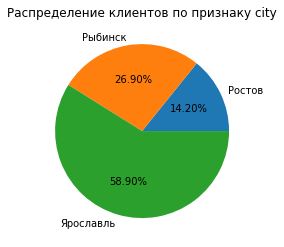

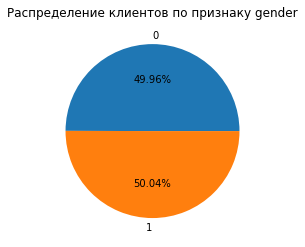

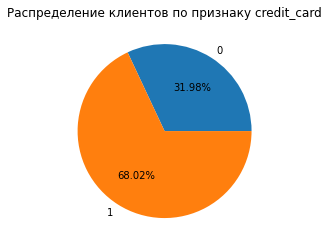

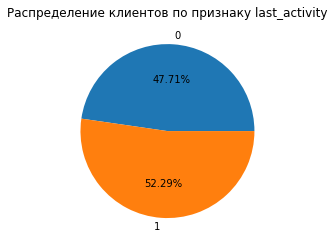

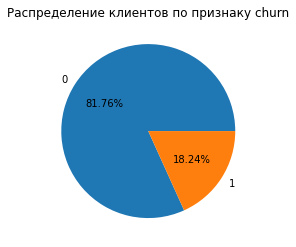

In [22]:
for column in ['city','gender','credit_card','last_activity','churn']:
    data = filtered_data.groupby(column).agg({'userid': 'count'})
    fig1,ax1 = plt.subplots()
    ax1.pie(data['userid'], labels=data.index, autopct='%1.2f%%')
    ax1.set_title(f'Распределение клиентов по признаку {column}')
    plt.show()

In [23]:
#посмотрим на средние и стандартные отклонения
pd.set_option('display.float_format', lambda x: '%.5f' % x)
filtered_data.describe()

,userid,score,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_missing
count,9974.00000,9974.00000,9974.00000,9974.00000,9974.00000,7695.00000,9974.00000,9974.00000,9974.00000,9974.00000,9974.00000,9974.00000
mean,171755.21867,848.68257,0.50040,42.73441,2.63084,827245.58752,1.87147,0.68017,0.52286,147786.80973,0.18237,0.22849
std,33695.52713,65.39972,0.50002,12.17997,1.97996,1980327.40973,0.79273,0.46643,0.49950,139285.51366,0.38617,0.41988
min,94561.00000,642.00000,0.00000,18.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2546.30000,0.00000,0.00000
25%,142760.00000,802.00000,0.00000,33.00000,0.00000,295698.71500,1.00000,0.00000,0.00000,75251.66000,0.00000,0.00000
50%,172643.00000,853.00000,1.00000,40.00000,3.00000,524295.33000,2.00000,1.00000,1.00000,119626.79500,0.00000,0.00000
75%,201163.75000,900.00000,1.00000,51.00000,4.00000,980051.21500,2.00000,1.00000,1.00000,174499.81250,0.00000,0.00000
max,229145.00000,1000.00000,1.00000,86.00000,9.00000,119113552.01000,5.00000,1.00000,1.00000,1395064.45000,1.00000,1.00000


Присутствуют записи о 9854 клиентах.

Средний скор клиентов по банку 848, примерно половина клиентов — мужчины, а половина — женщины, средний возраст около 43 лет, количество баллов собственности 2,6, средний баланс 823861, количество используемых продуктов банка в среднем 1,8 (тяготеет к 2), примерно 68% клиентов имеют кредитную карту, около половины клиентов активно использовали услуги компании в последнее время, предполагаемый средний уровень дохода клиентов - 147571.8

Стандартное отклонение по score 65.3, по est_salary - 138992 (может сильно различаться)

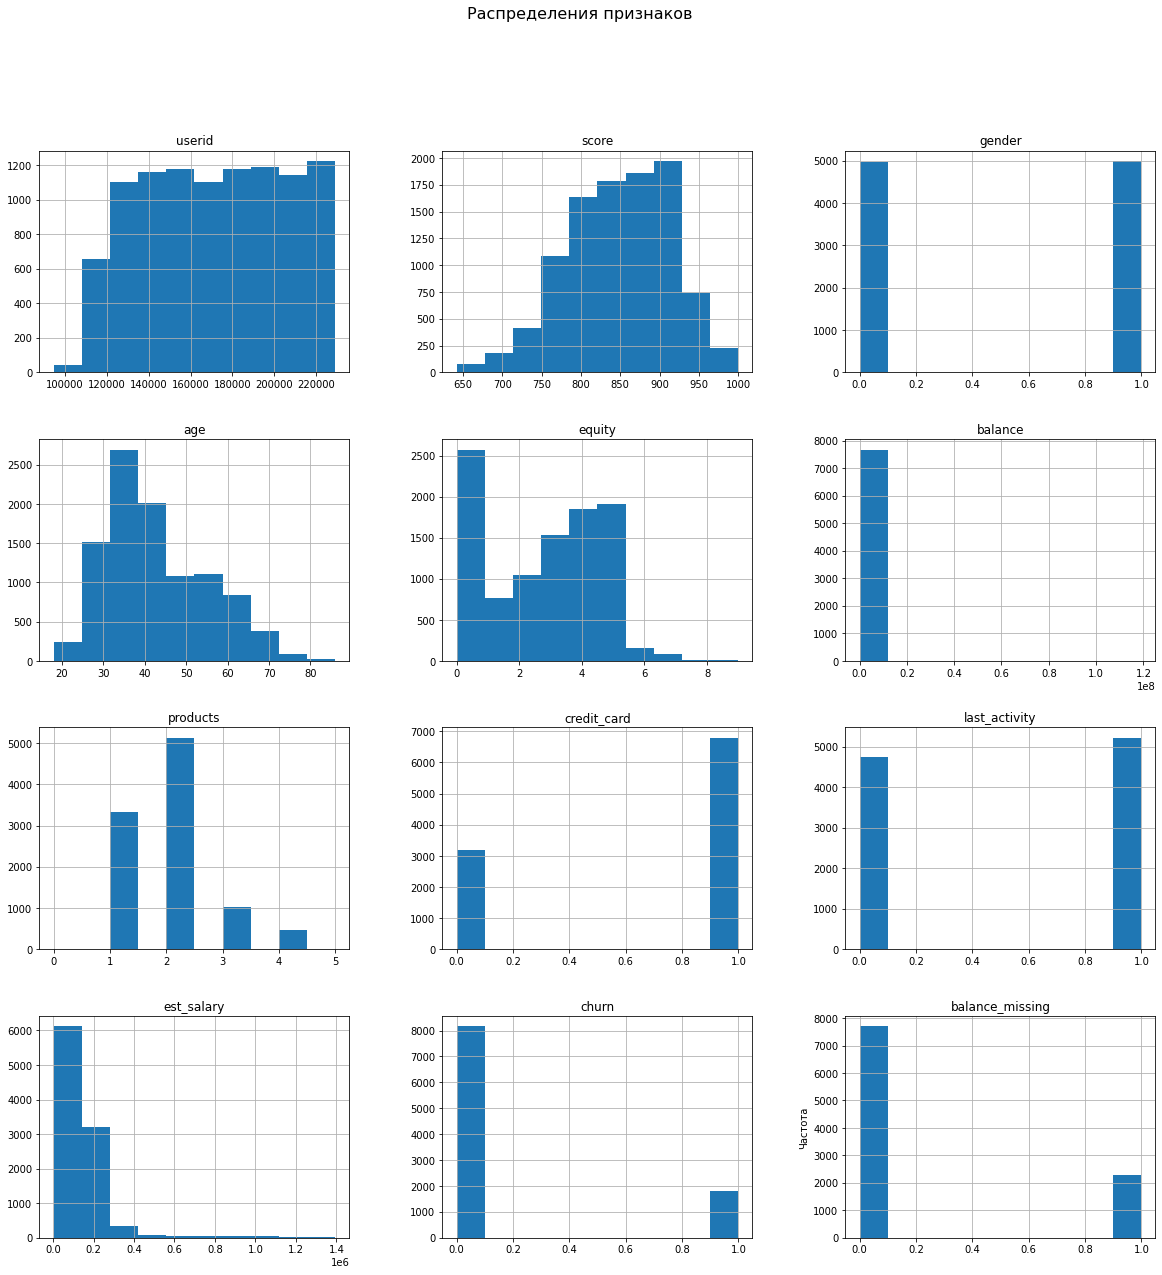

In [24]:
#посмотрим, как распределяются значения на гистограммах
filtered_data.hist(figsize=(20, 20))

plt.suptitle('Распределения признаков', fontsize=16) 
plt.ylabel('Частота')  # задает название оси Y

# Показать график
plt.show()


In [25]:
filtered_data['churn'].head()

0    1
1    0
2    0
3    1
4    1
Name: churn, dtype: int64

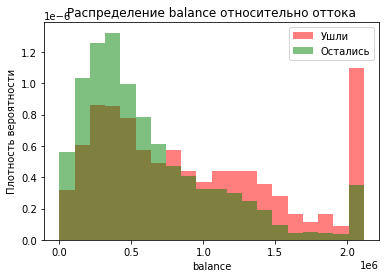

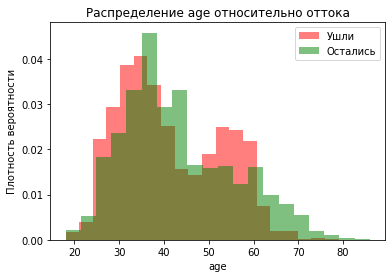

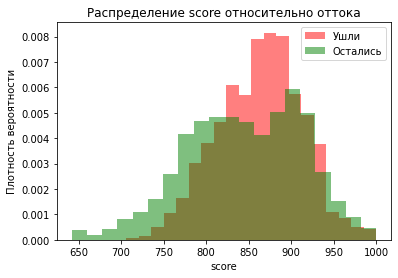

Hello, I am BARPLOT 📊 for col: equity


No handles with labels found to put in legend.


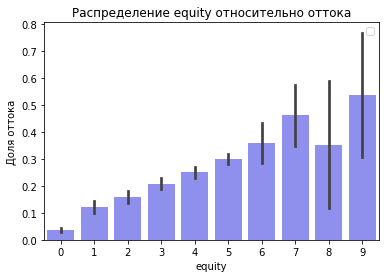

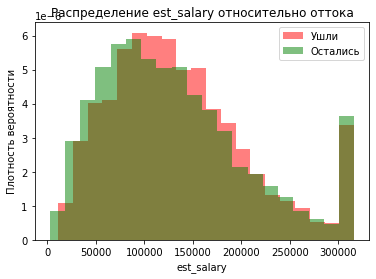

No handles with labels found to put in legend.


Hello, I am BARPLOT 📊 for col: gender


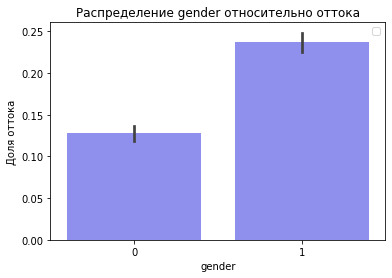

No handles with labels found to put in legend.


Hello, I am BARPLOT 📊 for col: products


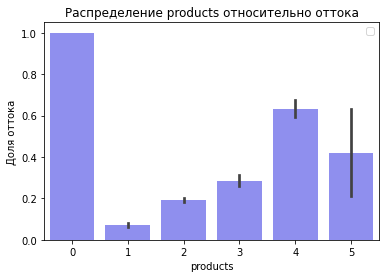

No handles with labels found to put in legend.


Hello, I am BARPLOT 📊 for col: balance_missing


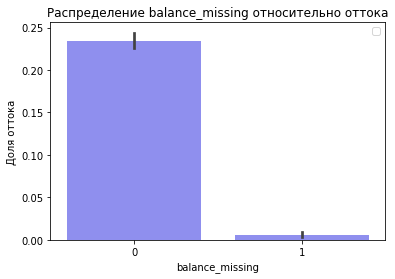

No handles with labels found to put in legend.


Hello, I am BARPLOT 📊 for col: last_activity


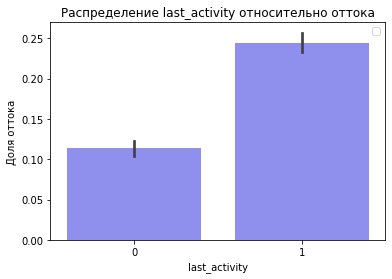

No handles with labels found to put in legend.


Hello, I am BARPLOT 📊 for col: credit_card


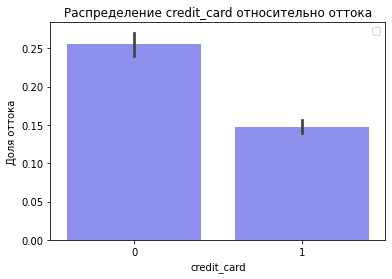

No handles with labels found to put in legend.


Hello, I am BARPLOT 📊 for col: city


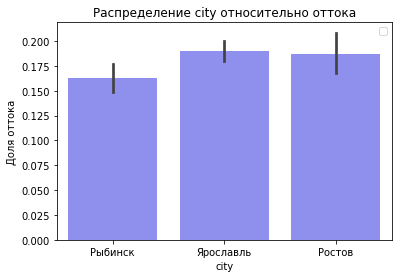

In [27]:
#оценим, как распределяются признаки в разрезе оттока
def draw_histogram(data, column):
    # Исключаем NaN значения в заданных колонках перед построением гистограмм
    if column in ['balance', 'est_salary']:
        data = data.dropna(subset=[column])
        
    #if data[column].dtype in ['float64', 'int64']:
    if  not column in ( 'equity', 'gender',  'products', 'balance_missing', 
                       'last_activity', 'credit_card', 'city'):
        limit = data[column].quantile(0.95) if column in ['balance', 'est_salary'] else None
        
        churn_1 = data[data['churn'] == 1][column]
        churn_0 = data[data['churn'] == 0][column]
        
        if limit:
            churn_1 = churn_1.clip(upper=limit)
            churn_0 = churn_0.clip(upper=limit)
        
        plt.hist(churn_1, density=True, alpha=0.5, color='red', label='Ушли', bins=20)
        plt.hist(churn_0, density=True, alpha=0.5, color='green', label='Остались', bins=20)
        plt.ylabel('Плотность вероятности')
    
    else:
        print(f"Hello, I am BARPLOT 📊 for col: {column}")
        sns.barplot(x=column, y='churn', data=data, color="blue", alpha=0.5, ci=95)
        plt.ylabel('Доля оттока')

    plt.xlabel(column)
    plt.title(f'Распределение {column} относительно оттока')
    plt.legend()
    plt.show()
    
columns_to_visualize = ['balance', 'age', 'score', 'equity','est_salary', 'gender', 
                        'products', 'balance_missing', 'last_activity', 'credit_card',
                       'city']
for column in columns_to_visualize:
    draw_histogram(filtered_data, column)



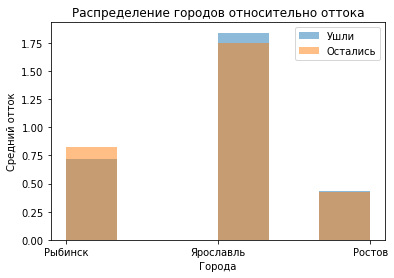

In [28]:
churn_1 = filtered_data[filtered_data['churn'] == 1]['city']
churn_0 = filtered_data[filtered_data['churn'] == 0]['city']
plt.hist(churn_1, density=True, alpha=0.5, label='Ушли', bins=6)
plt.hist(churn_0, density=True, alpha=0.5, label='Остались', bins=6)
plt.xlabel('Города')
plt.ylabel('Средний отток')
plt.title(f'Распределение городов относительно оттока')
plt.legend()
plt.show();

Исследуем странные пики на графиках с балансом и доходом

In [29]:
# Выбор записей, где значение balance превышает 2 млн
high_balance_data = filtered_data[filtered_data['balance'] > 2000000]

# Вывод результатов
print(high_balance_data.describe())



            userid      score    gender       age    equity         balance  \
count    427.00000  427.00000 427.00000 427.00000 427.00000       427.00000   
mean  175001.38642  924.74941   0.63934  45.07026   4.32787   4461754.92180   
std    36104.90632   33.86206   0.48075  11.04981   1.00946   7324260.81190   
min    96562.00000  784.00000   0.00000  23.00000   1.00000   2009137.23000   
25%   147536.00000  903.00000   0.00000  36.00000   4.00000   2355242.95500   
50%   176292.00000  927.00000   1.00000  42.00000   5.00000   2917343.54000   
75%   208416.00000  948.00000   1.00000  54.00000   5.00000   4090910.72000   
max   229058.00000 1000.00000   1.00000  78.00000   8.00000 119113552.01000   

       products  credit_card  last_activity    est_salary     churn  \
count 427.00000    427.00000      427.00000     427.00000 427.00000   
mean    2.45667      0.45667        0.52693  324997.27485   0.49180   
std     0.88274      0.49870        0.49986  265158.57895   0.50052   
min 

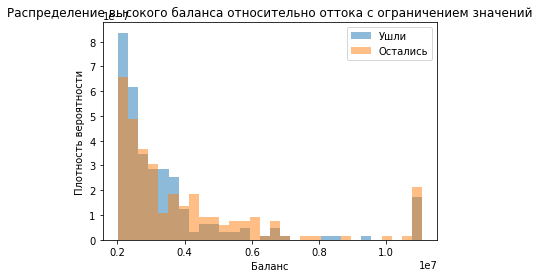

In [30]:
# Определение 95-го квантиля значения баланса в исходных данных
quantile_limit = high_balance_data['balance'].quantile(0.95)

# Удаление NaN значений и ограничение максимальных значений
high_balance_data_churn = high_balance_data[high_balance_data['churn'] == 1]['balance'].dropna().clip(upper=quantile_limit)
high_balance_data_nochurn = high_balance_data[high_balance_data['churn'] == 0]['balance'].dropna().clip(upper=quantile_limit)

# Процесс создания гистограмм
plt.hist(high_balance_data_churn, density=True, alpha=0.5, label='Ушли', bins=30)
plt.hist(high_balance_data_nochurn, density=True, alpha=0.5, label='Остались', bins=30)
plt.xlabel('Баланс')
plt.ylabel('Плотность вероятности')
plt.title('Распределение высокого баланса относительно оттока с ограничением значений')
plt.legend()
plt.show()


На уровне от 2 до 4 миллионов остатка на счетах действительно есть видимая на графиках группа клиентов

In [31]:
sorted_data = high_balance_data.sort_values(by='balance', ascending=True)
display(sorted_data)

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_missing
2553,120805,918.00000,Ярославль,0,41.00000,5,2009137.23000,3,0,0,353877.02000,0,0
2028,226862,872.00000,Рыбинск,1,46.00000,5,2011026.80000,2,1,0,207625.33000,0,0
1827,150691,938.00000,Ярославль,0,34.00000,5,2011480.78000,3,0,1,188466.37000,1,0
1750,162532,894.00000,Ярославль,1,56.00000,5,2011608.98000,2,0,1,188723.67000,1,0
7135,170198,871.00000,Ярославль,0,58.00000,5,2013209.77000,1,1,0,991490.31000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9753,122015,885.00000,Ярославль,1,64.00000,4,25727761.86000,3,1,0,168746.90000,0,0
4721,228786,1000.00000,Ярославль,1,45.00000,5,29008931.92000,2,0,1,811804.54000,0,0
1846,114088,927.00000,Ярославль,1,57.00000,5,43277099.84000,3,0,1,82619.00000,0,0
1059,114103,894.00000,Ярославль,1,58.00000,4,64866210.15000,2,1,1,88861.60000,1,0


Очевидно, что это группа людей размером 427 записей с с высокими остатками на счетах

In [48]:
#очень высокий оценочный доход
high_salary_data = filtered_data[filtered_data['est_salary'] > 300000]

# Вывод результатов
print(high_salary_data.describe())

            userid      score    gender       age    equity        balance  \
count    562.00000  562.00000 562.00000 562.00000 562.00000      216.00000   
mean  171970.11388  880.54982   0.60676  41.83452   1.59253  4077234.31773   
std    33718.78931   87.40780   0.48890  10.31998   2.12518  4333500.74707   
min    97550.00000  686.00000   0.00000  24.00000   0.00000    66103.84000   
25%   144801.25000  817.50000   0.00000  35.00000   0.00000  1244748.63250   
50%   171539.00000  914.50000   1.00000  40.00000   0.00000  2959440.65500   
75%   200937.75000  942.00000   1.00000  47.00000   4.00000  5144719.50250   
max   228876.00000 1000.00000   1.00000  80.00000   8.00000 29008931.92000   

       products  credit_card  last_activity    est_salary     churn  \
count 562.00000    562.00000      562.00000     562.00000 562.00000   
mean    1.62456      0.73310        0.57651  584464.81625   0.16904   
std     0.86914      0.44274        0.49455  275804.02256   0.37512   
min     1.000

In [49]:
sorted_data2 = high_salary_data.sort_values(by='est_salary', ascending=True)
display(sorted_data2)

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_missing
3211,205266,715.00000,Ярославль,1,35.00000,0,NaN,1,1,0,300133.28000,0,1
1314,135593,866.00000,Ярославль,0,47.00000,4,1248549.87000,4,1,0,300218.51000,1,0
8802,180832,721.00000,Рыбинск,1,33.00000,0,NaN,1,1,1,300283.62000,0,1
7009,222642,923.00000,Ярославль,0,42.00000,0,NaN,1,1,1,300615.59000,0,1
6812,146712,867.00000,Ярославль,0,39.00000,2,2758303.92000,2,0,1,301241.64000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5160,174746,731.00000,Ярославль,0,30.00000,0,NaN,2,1,0,1296838.08000,0,1
1600,197637,785.00000,Ярославль,1,41.00000,0,NaN,1,1,0,1307090.18000,0,1
4473,216422,956.00000,Ярославль,1,27.00000,0,NaN,1,1,0,1333687.36000,0,1
4637,149430,961.00000,Ярославль,1,37.00000,5,4054667.81000,3,0,0,1363549.52000,0,0


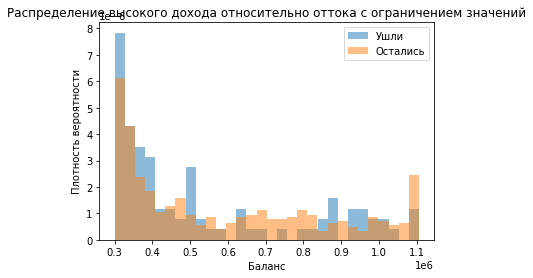

In [50]:
# Определение 95-го квантиля значения оценочного дохода в исходных данных
quantile_limit = high_salary_data['est_salary'].quantile(0.95)

# Удаление NaN значений и ограничение максимальных значений
high_salary_data_churn = high_salary_data[high_salary_data['churn'] == 1]['est_salary'].dropna().clip(upper=quantile_limit)
high_salary_data_nochurn = high_salary_data[high_salary_data['churn'] == 0]['est_salary'].dropna().clip(upper=quantile_limit)

#нарисуем гистограммы
plt.hist(high_salary_data_churn, density=True, alpha=0.5, label='Ушли', bins=30)
plt.hist(high_salary_data_nochurn, density=True, alpha=0.5, label='Остались', bins=30)
plt.xlabel('Баланс')
plt.ylabel('Плотность вероятности')
plt.title('Распределение высокого дохода относительно оттока с ограничением значений')
plt.legend()
plt.show()


На уровне 300 тысяч и выше действительно существует видимая на графиках группа клиентов банка. Это группа размером 562 записей

In [51]:
sorted_data3=[]
for row in sorted_data:
    if row in sorted_data2:
        sorted_data3.append(row)
print(len(sorted_data3))

13


И группы с высоким остатком и с высоким оценочным доходом пересекаются в малой степени (всего 13 записей)

Оценим, как распределяются признаки группы с высоким остатком в разрезе оттока

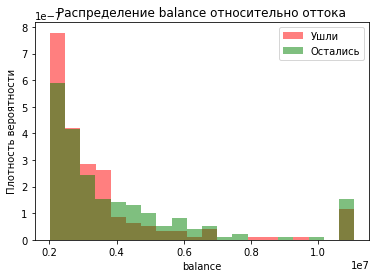

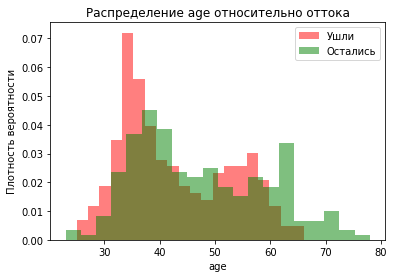

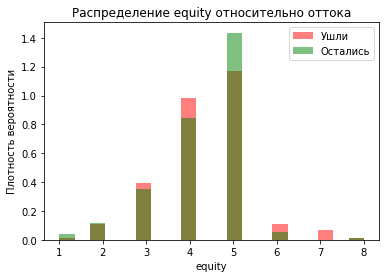

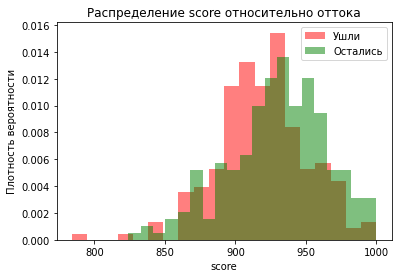

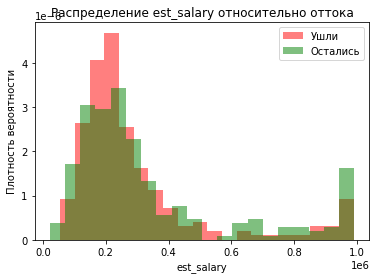

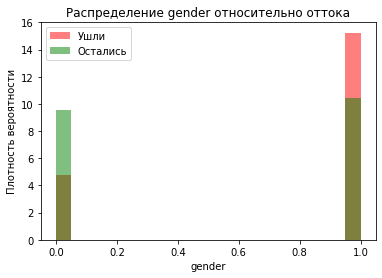

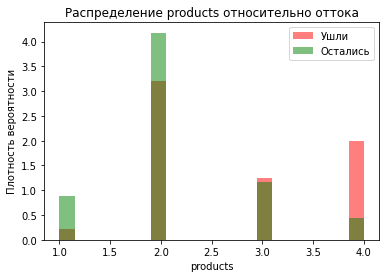

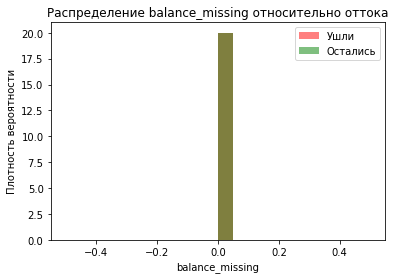

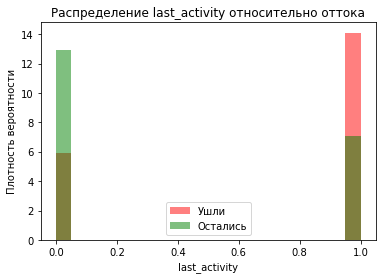

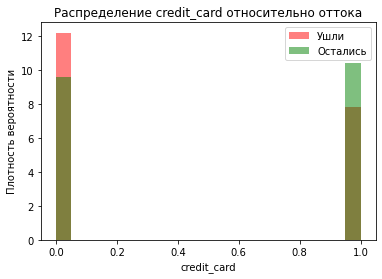

In [52]:
columns_to_visualize = ['balance', 'age', 'equity','score', 'est_salary', 'gender', 'products', 'balance_missing', 'last_activity', 'credit_card']
for column in columns_to_visualize:
    draw_histogram(sorted_data, column)

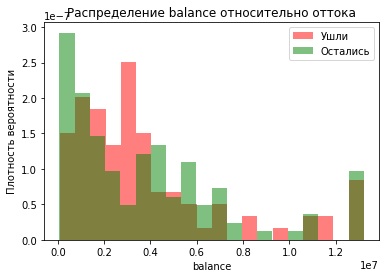

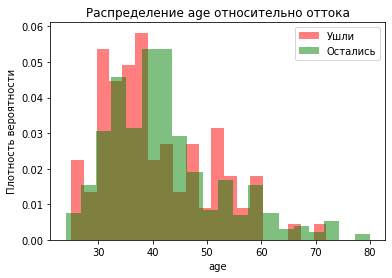

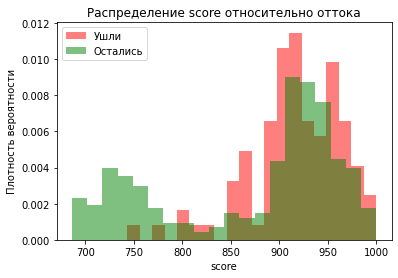

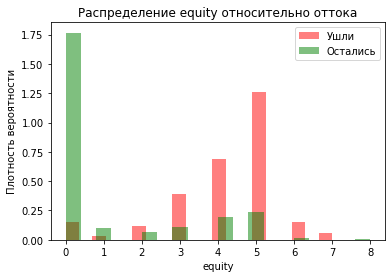

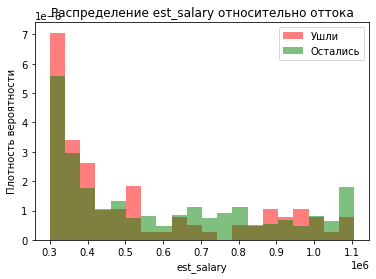

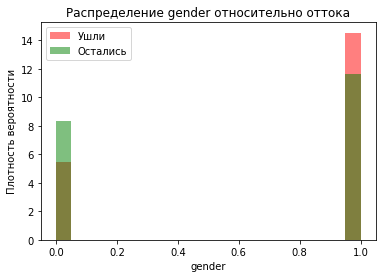

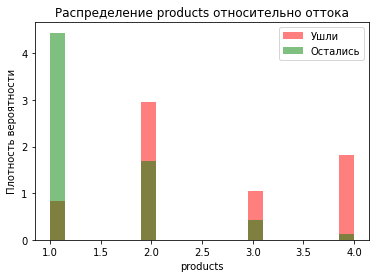

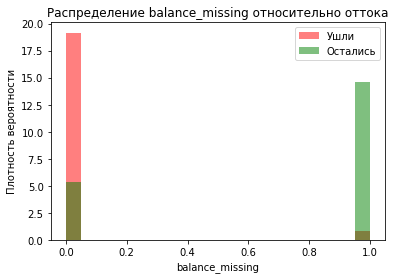

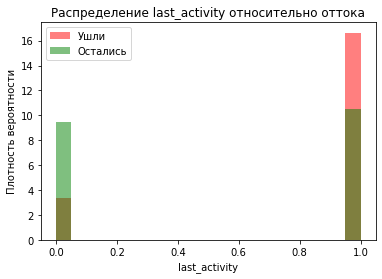

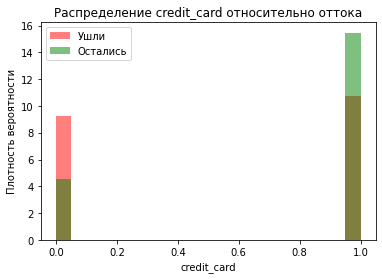

In [53]:
#сделаем то же самое для группы с высоким оценочным доходом
columns_to_visualize = ['balance', 'age', 'score', 'equity','est_salary', 'gender', 'products', 'balance_missing', 'last_activity', 'credit_card']
for column in columns_to_visualize:
    draw_histogram(sorted_data2, column)

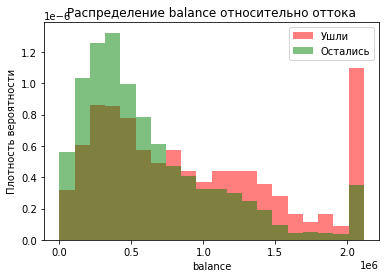

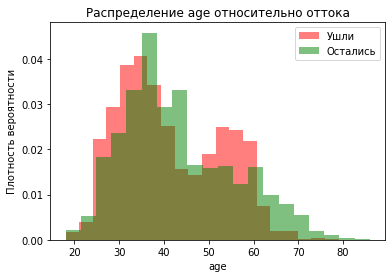

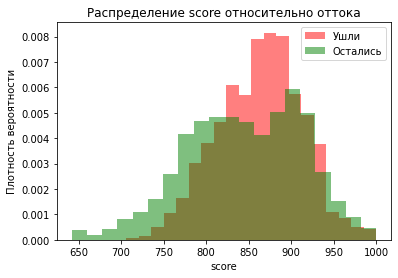

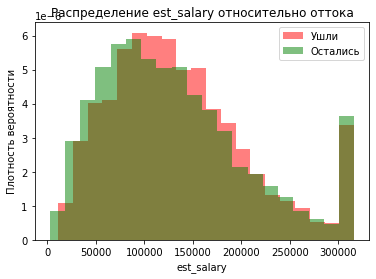

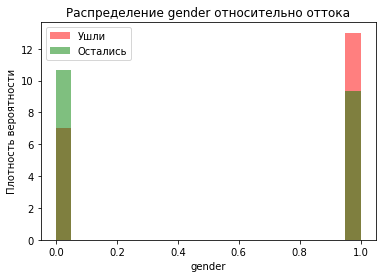

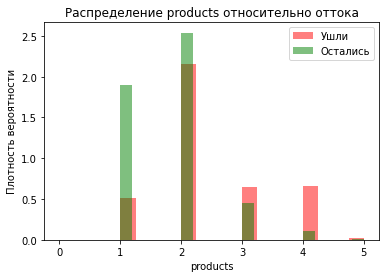

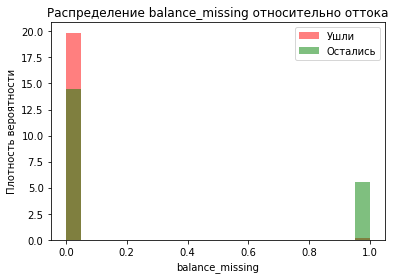

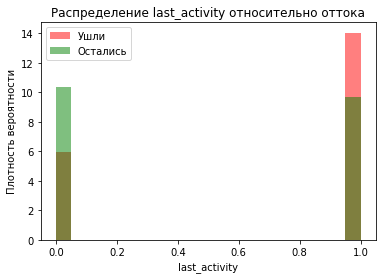

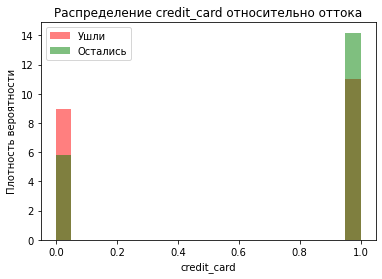

In [54]:
#перепишем код для графиков с учетом пропусков
def draw_histogram(data, column):
    # Исключаем NaN значения в заданных колонках перед построением гистограмм
    if column in ['balance', 'est_salary']:
        data = data.dropna(subset=[column])
    
    if data[column].dtype in ['float64', 'int64']:
        limit = data[column].quantile(0.95) if column in ['balance', 'est_salary'] else None
        
        churn_1 = data[data['churn'] == 1][column]
        churn_0 = data[data['churn'] == 0][column]
        
        if limit:
            churn_1 = churn_1.clip(upper=limit)
            churn_0 = churn_0.clip(upper=limit)
        
        plt.hist(churn_1, density=True, alpha=0.5, color='red', label='Ушли', bins=20)
        plt.hist(churn_0, density=True, alpha=0.5, color='green', label='Остались', bins=20)
        plt.ylabel('Плотность вероятности')
    
    else:
        sns.barplot(x=column, y='churn', data=data, ci=95)
        plt.ylabel('Доля оттока')

    plt.xlabel(column)
    plt.title(f'Распределение {column} относительно оттока')
    plt.legend()
    plt.show()

columns_to_visualize = ['balance', 'age', 'score', 'est_salary', 'gender', 'products', 'balance_missing', 'last_activity', 'credit_card']
for column in columns_to_visualize:
    draw_histogram(filtered_data, column)


1. <b>Клиенты с двумя продуктами</b>: Клиенты, использующие два продукта, имеют самую низкую склонность к уходу из банка; их количество значительно превосходит количество ушедших. Напротив, клиенты с тремя продуктами более склонны к уходу. Клиенты с 4 и более продуктами также не очень лояльны. Несмотря на малую выборку, количество ушедших также превышает количество оставшихся.

2. Кривая распределения <b>кредитных скоров</b> для клиентов, которые остались в банке, представляет собой более широкое распределение с максимальным пиком в районе 850. Это говорит о более разнообразной кредитоспособности среди оставшихся клиентов. Для клиентов, ушедших из банка, распределение кредитных скоров немного меньше смещено влево и имеет более ограниченный разброс. Основной пик уходящих клиентов также приходится на значение около 850, но кривая становится выше и уже после значения 800 в сравнении с теми, кто остался. Тут может быть интересная <b>группа риска</b>, со скором между 820 и 900). Основные пики обеих категорий (приблизительно в районе 850) указывают на то, что средний кредитный скор клиентов, как уходящих, так и оставшихся в банке, относительно высок и схож.

3. Концентрация возраста ушедших клиентов: Ушедшие клиенты в основном сконцентрированы в <b>возрастной группе примерно от 35 до 50 лет</b>. Максимальный пик ухода наблюдается у возрастной категории около 42 лет. Клиенты младше 35 лет и старше 60 лет, в основном, с меньшей вероятностью уходят из банка по сравнению с возрастной группой 35-50 лет.  Клиенты, оставшиеся в банке: широкое распределение возрастов с довольно постепенным убыванием по мере увеличения возраста и максимальной плотностью в районе 35-40 лет.

4. Среди <b>женщин</b> наблюдается выше доля ушедших по сравнению с мужчинами.
5. <b>Ярославль</b> демонстрирует самую высокую долю ушедших клиентов по сравнению с теми, кто остался. Отток здесь максимален. Возможно, в Ярославле существует более высокая конкуренция с другими банками, предлагающими более привлекательные условия или продукты.
6. Заметен сильный пик в самом конце диапазона оценочного дохода около 300,000, особенно среди оставшихся в банке клиентов. Однако в целом график уходящих клиентов смещен вправо относительно графика остающихся. Это указывает на то, что <b>клиенты с более высокими доходами менее склонны оставаться с банке</b>
7.  Заметен сильный пик в самом конце диапазона баланса на счету, особенно среди уходящих из банка клиентов. В целом график уходящих клиентов смещен вправо относительно графика остающихся. Это указывает на то, что <b>клиенты с более высокими остатками на счетах менее склонны оставаться с банке</b>.



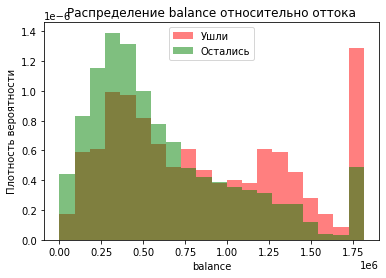

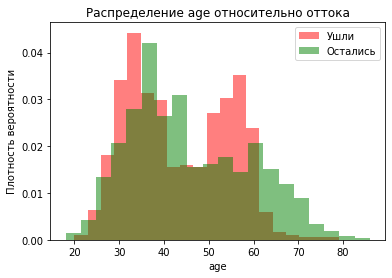

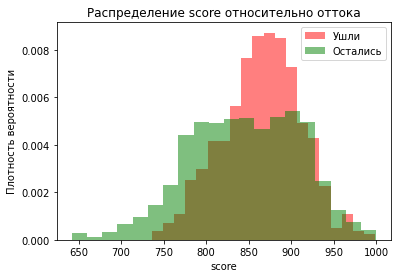

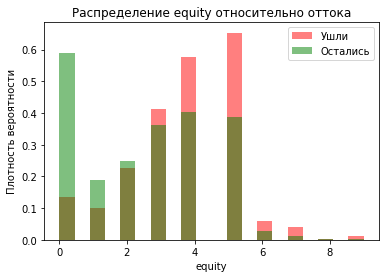

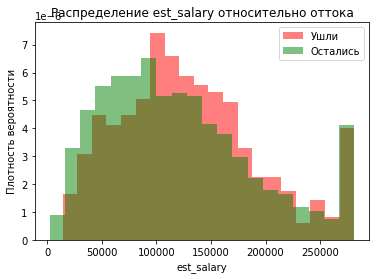

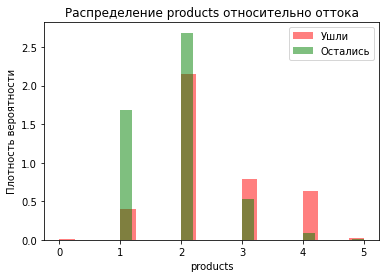

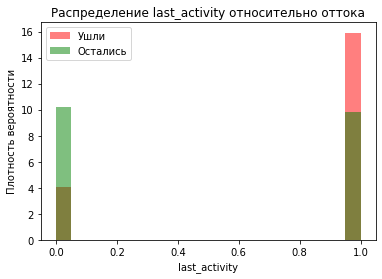

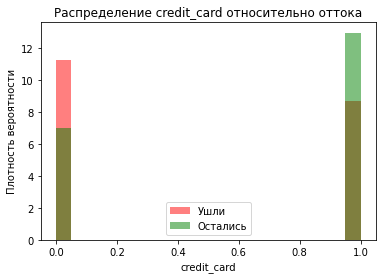

In [55]:
woman=filtered_data[filtered_data['gender'] == 0]

columns_to_visualize = ['balance', 'age', 'score', 'equity','est_salary', 'products', 'last_activity', 'credit_card']
for column in columns_to_visualize:
    draw_histogram(woman, column)


Также на этом шаге мы видим на графиках такие группы отточных клиентов:
- мужчины 25-37 лет, имеющие на счету от 2 до 4 млн, кредитный скор до 940 баллов, оценочный доход от 100 до 250 тысяч рублей, без кредитной карты, с 3 и особенно 4 банковскими продуктами, активные пользователи. 
- мужчины 50-60 лет, имеющие на счету от 2 до 4 млн, кредитный скор до 940 баллов, оценочный доход от 100 до 250 тысяч рублей, без кредитной карты, с 3 и особенно 4 банковскими продуктами, активные пользователи.

- мужчины с оценочным доходом более 300 тысяч, 45-60 лет, с двумя и более продуктами, активные пользователи, без кредитной карты, с более чем 2 баллами недвижимости.
- мужчины с оценочным доходом более 300 тысяч, 25-38 лет, от 1 млн до 4 на счету, с более чем 2 баллами недвижимости, с 2 и более продуктами, без кредитной карты.

- женщины с остатком на счету 750 тысяч и более, 23-40 года, 830-920 баллов кредитного скоринга, более 2 баллов владения недвижимостью/капиталом, оценочным доходом от 100 до 250 тысяч, более чем с 2 продуктами, активные пользователи, без кредитной карты
- женщины с остатком на счету 750 тысяч и более, 50-60 года, 830-920 баллов кредитного скоринга, более 2 баллов владения недвижимостью/капиталом, оценочным доходом от 100 до 250 тысяч, более чем с 2 продуктами, активные пользователи, без кредитной карты

Заметим, что это группы разного возраста и поэтому, вероятно, с разными задачами, имеющие отличия в поведенческих признаках, объединенные тем, что это все - активные пользователи банковских услуг, без кредитной карты, имеющие более 2 продуктов. Заметим также, что женщины склонны к смене банка в целом в менее устойчивом финансовом состоянии, чем мужчины.

### Гипотезы и рекомендации:

- Усиленная поддержка: Предоставлять дополнительную поддержку и стимулы для клиентов с 3 и более продуктами, так как эта группа кажется более склонной к уходу.
- Кросс-продажи: Клиентам с одним продуктом стоит активнее предлагать кросс-продажи до двух продуктов. Владение двумя продуктами кажется оптимальным и способствует лояльности.
- Образовательные программы: Возможно, клиенты не полностью осознают все преимущества использования более одного продукта. Образовательные программы могут помочь им лучше понять, как можно извлечь пользу из многообразия предлагаемых услуг.
- Адаптация продуктов: Необходимо адаптировать продукты и услуги под конкретные потребности возрастных групп, особенно тех, кто находится в возрасте от 35 до 50 лет.
- Поиск лучших условий: Возможно, в возрасте 35-50 лет клиенты активнее ищут более выгодные условия обслуживания или ставки по кредитам и вкладам, что стимулирует их к смене банка.
- Повышение лояльности: Разработать программы лояльности и предложения, нацеленные на удержание клиентов среднего возраста, сконцентрировав внимание на их специфических финансовых и личных потребностях.
- Консультационные услуги: Усилить предложения консультационных услуг для клиентов среднего возраста, которые могут нуждаться в финансовом планировании или советах по инвестициям для достижения своих краткосрочных и долгосрочных целей.
- Факторы карьеры и финансовые потребности: Возрастная группа 35-50 лет часто характеризуется изменениями в карьере и повышенной финансовой нагрузкой (ипотека, образование детей и т. д.), что может влиять на их лояльность к банку, если они не находят нужной поддержки или выгодных условий.
- Консультации по недвижимости: Предложить консультационные услуги или семинары по вопросам роста капитала, что может быть привлекательно для клиентов с низкими баллами equity.

- Условия обслуживания или предложения: Возможно, условия обслуживания или конкретные продуктовые предложения могут быть менее привлекательны для женщин или не удовлетворять их конкретные потребности.
- Финансовые потребности: Женщины могли сталкиваться с различными финансовыми потребностями, которые банк не смог удовлетворить, что способствовало их более высокой доле ухода.
- Восприятие бренда и обслуживание: Эффекты взаимоотношений с клиентом и обслуживание могут различаться, и женщины могут оценить качество обслуживания банка хуже по сравнению с мужчинами, или банк мог не принимать во внимание гендерно-специфичные предпочтения.
- Гендерно-ориентированный маркетинг и продукты: Исследовать потребности и предпочтения женщин для разработки специализированных продуктов или услуг, которые могут быть для них более привлекательными.
- Изучить предложения конкурентов в Ярославле и адаптировать или создать новые продукты, которые могут оказаться привлекательными для местных клиентов.



Перепроверим, что происходит с графиком распределения баланса

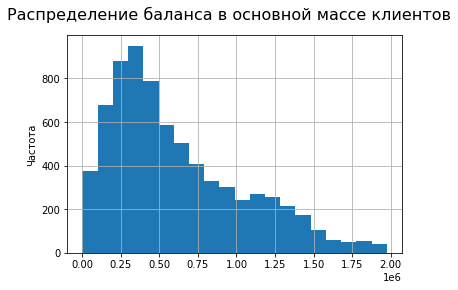

In [56]:
filtered_data['balance'].hist(bins=20, range =(0,1975494))
plt.suptitle('Распределение баланса в основной массе клиентов', fontsize=16)
plt.ylabel('Частота') ;

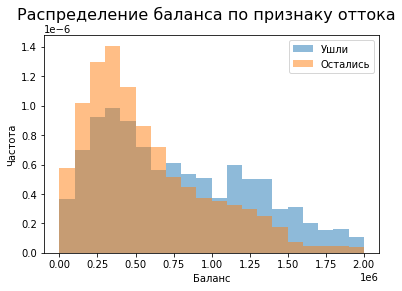

In [57]:
#баланс по оттоку
churn_1 = filtered_data[filtered_data['churn'] == 1]['balance']
churn_0 = filtered_data[filtered_data['churn'] == 0]['balance']
plt.hist(churn_1, density=True, alpha=0.5, label='Ушли', bins=20, range=(1, 2000000))
plt.hist(churn_0, density=True, alpha=0.5, label='Остались', bins=20, range=(1, 2000000))
plt.suptitle('Распределение баланса по признаку оттока', fontsize=16)
plt.xlabel('Баланс')
plt.ylabel('Частота')
plt.legend();

Люди с более высоким остатком на счете более склонны к оттоку

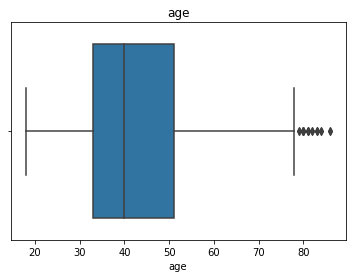

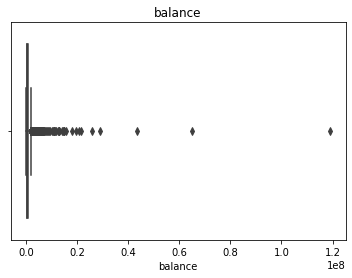

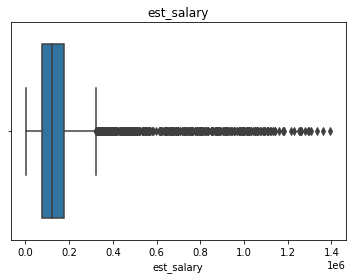

In [58]:
#построим диаграмму размаха и определим выбросы в столбцах с возрастом, балансом на счёте и доходом
for column in ['age', 'balance', 'est_salary']:
    plt.figure()
    sns.boxplot(x=column, data=filtered_data)
    plt.title (column)
    plt.show();

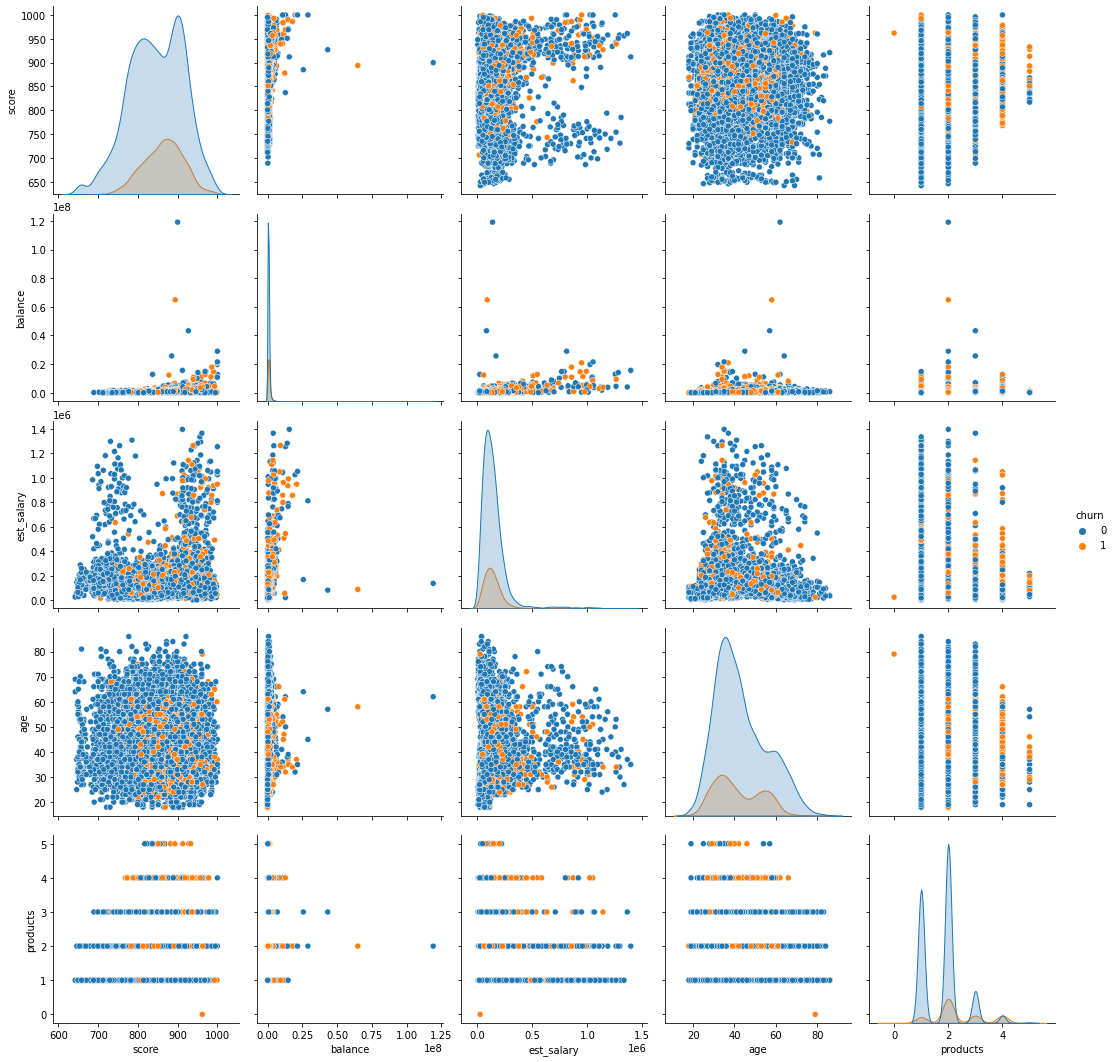

In [59]:
#на всякий случай посмотрим на взимосвязи 
sns.pairplot(filtered_data[['score','balance','est_salary','churn','age', 'products']], hue='churn', height=3);

- у уходящих клиентов в среднем наблюдается несколько более низкий score
- у уходящих клиентов выше средний баланс по сравнению с теми, кто остался. Примечательно, что существует значительное количество клиентов с балансом, равным нулю, у которых шансы на уход ниже.
- распределение est_salary схоже для обеих категорий клиентов, кажется, что это незначимый признак
- слабая зависимость между score и balance. В целом, у тех, кто ушёл, баланс выше при сравнимых значениях score
- нет выраженной зависимости между score и est_salary, а также balance и est_salary

Для построения матрицы корреляций поправим значения городов


In [60]:
filtered_data

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_missing
0,183012,850.00000,Рыбинск,0,25.00000,1,59214.82000,2,0,1,75719.14000,1,0
1,146556,861.00000,Рыбинск,0,37.00000,5,850594.33000,3,1,0,86621.77000,0,0
2,120722,892.00000,Рыбинск,0,30.00000,0,NaN,1,1,1,107683.34000,0,1
3,225363,866.00000,Ярославль,0,51.00000,5,1524746.26000,2,0,1,174423.53000,1,0
4,157978,730.00000,Ярославль,1,34.00000,5,174.00000,1,1,0,67353.16000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.00000,Рыбинск,1,27.00000,1,78144.65000,1,0,1,18943.64000,0,0
9996,139170,894.00000,Ярославль,1,46.00000,0,NaN,1,1,0,196898.29000,0,1
9997,115639,903.00000,Ярославль,1,24.00000,0,NaN,2,1,1,108905.09000,0,1
9998,148700,777.00000,Ярославль,0,68.00000,3,865457.97000,3,0,1,86874.90000,0,0


In [61]:
#применим get_dummies r столбцу city
city_dummies = pd.get_dummies(filtered_data['city'], prefix='city')
filtered_data = pd.concat([filtered_data, city_dummies], axis=1)
print(filtered_data.sample(5))


      userid     score       city  gender      age  equity       balance  \
5399  169312 904.00000     Ростов       0 57.00000       0           NaN   
4689  179862 887.00000  Ярославль       0 71.00000       2  226859.64000   
6708  131738 944.00000     Ростов       0 54.00000       0           NaN   
6969  162356 703.00000    Рыбинск       0 69.00000       0           NaN   
6689  165315 891.00000  Ярославль       1 27.00000       6 1018956.02000   

      products  credit_card  last_activity   est_salary  churn  \
5399         1            1              1 106017.64000      0   
4689         2            0              1  54524.58000      0   
6708         1            0              0 153762.87000      0   
6969         1            1              1  50771.38000      0   
6689         2            1              1 413085.71000      1   

      balance_missing  city_Ростов  city_Рыбинск  city_Ярославль  
5399                1            1             0               0  
4689        

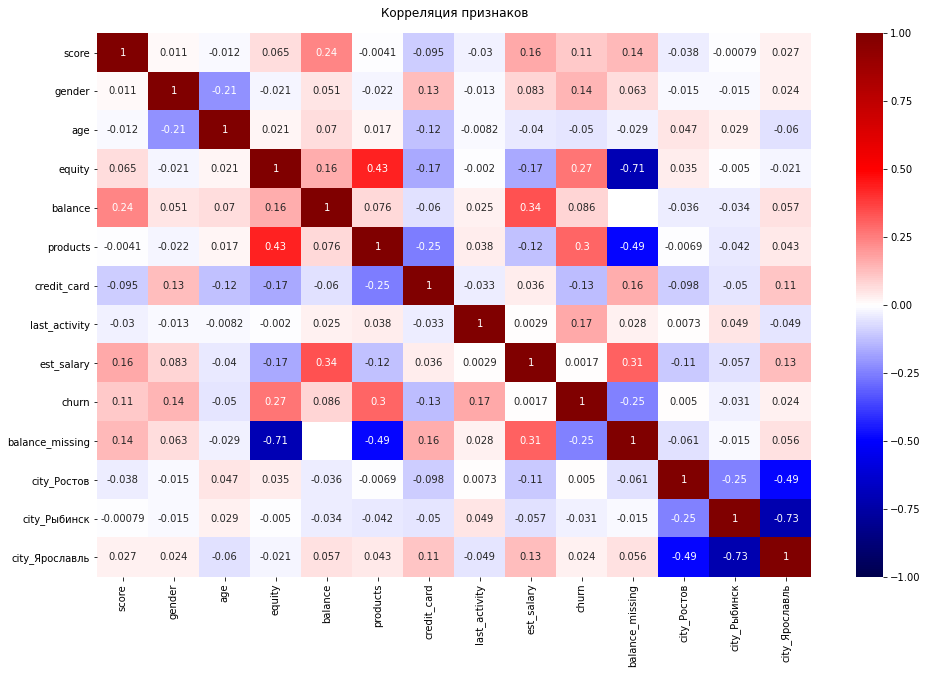

In [62]:
data_cor = filtered_data.drop(['userid'], axis=1)
plt.figure(figsize=(16, 10)) 
heatmap = sns.heatmap(data_cor.corr(), vmin=-1, vmax=1, annot=True, cmap='seismic') 

heatmap.set_title('Корреляция признаков', fontdict={'fontsize':12}, pad=16);

Корреляция с оттоком (churn):
1. Использование кредитных карт:
   - Отрицательная корреляция (-0.13) показывает, что клиенты, активно использующие кредитные карты, менее склонны к оттоку. Вероятно, они более вовлечены в продукты банка, что повышает их лояльность и уменьшает вероятность ухода.
2. Последняя активность (last_activity):
   - Слабая положительная корреляция (0.17) может свидетельствовать о том, что более давняя последняя активность часто коррелирует с высоким оттоком, что указывает на потерю интереса к услугам банка
3. Использование продуктов (products):
   - Положительная корреляция (0.3) между количеством использованных продуктов и оттоком противоречива и требует дополнительного анализа. Это может означать, что клиенты, использующие больше продуктов, чувствуют недовольство определёнными аспектами сервиса.
4. Капитал (equity):
   - Положительная корреляция (0.27) показывает, что у клиентов с большим количеством капитала вероятность ухода выше, возможно, из-за того, что они могут получить более выгодные условия в других банках.
5. Пол (gender) и кредитный рейтинг (score):
   - Положительные корреляции с gender (0.14) и score (0.11) указывают на то, что мужчины и клиенты с высокими оценками кредитного рейтинга чаще уходят из банка.
6. Баланс (balance):
   - Очень слабая положительная корреляция (0.085) может означать, что клиенты с более высоким балансом немного чаще уходят, но влияние этого фактора является минимальным
   
Другое
1. Отрицательная корреляция (-0.49) между количеством продуктов и пропусками по балансу свидетельствует о том, что чем больше продуктов использует клиент, тем полнее данные по его балансу – вероятно, за счёт лучшего мониторинга и управления счетами.
2. Географическое распределение оттока:
   - Слабые корреляции оттока с городами Ярославль и Рыбинск могут свидетельствовать о местных особенностях взаимодействия с клиентами
3. Пропуски данных (balance_missing):
   - Отрицательная корреляция (-0.25) указывает на то, что с увеличением количества пропусков в данных по балансу уровень оттока снижается. Необходимо дополнительно исследовать эту группу клиентов

<h3>Количество потребляемых продуктов и отличительные черты клиентов</h3>
Разделить пользователей на основе данных о количестве потребляемых продуктов, исследовать отличительные черты получившихся групп (средние и распределения признаков). Посчитать долю оттока по сегментам.

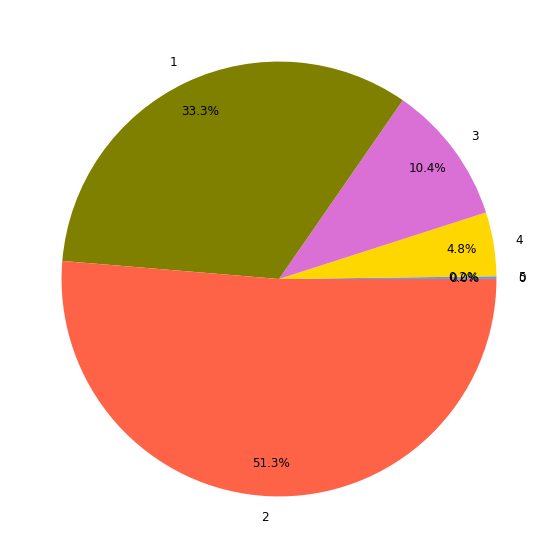

In [63]:
product_group = filtered_data.groupby('products')['products'].count().sort_values()


fig, ax1 = plt.subplots(figsize=(10, 10))
ax1.pie(product_group.values, labels = product_group.index, autopct='%1.1f%%', textprops={'fontsize':12}, pctdistance=0.85, colors=[
        # matplotlib named colors 
        'tomato', 'cornflowerblue', 'gold', 'orchid', 'olive'])

plt.show()


Видим, что более половины клиентов используют два продукта банка, 33,3 - один продукт, три продукта использует 10.4 процента, у 4,8% - 4 продукта, клиентов с более 5 и 0 исчезающе мало

In [64]:
#абсолюты
print(product_group)

products
0       1
5      19
4     474
3    1038
1    3323
2    5119
Name: products, dtype: int64


In [65]:
filtered_data.head()

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_missing,city_Ростов,city_Рыбинск,city_Ярославль
0,183012,850.00000,Рыбинск,0,25.00000,1,59214.82000,2,0,1,75719.14000,1,0,0,1,0
1,146556,861.00000,Рыбинск,0,37.00000,5,850594.33000,3,1,0,86621.77000,0,0,0,1,0
2,120722,892.00000,Рыбинск,0,30.00000,0,NaN,1,1,1,107683.34000,0,1,0,1,0
3,225363,866.00000,Ярославль,0,51.00000,5,1524746.26000,2,0,1,174423.53000,1,0,0,0,1
4,157978,730.00000,Ярославль,1,34.00000,5,174.00000,1,1,0,67353.16000,1,0,0,0,1


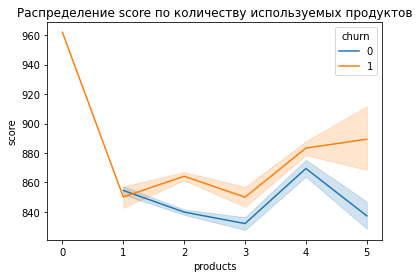

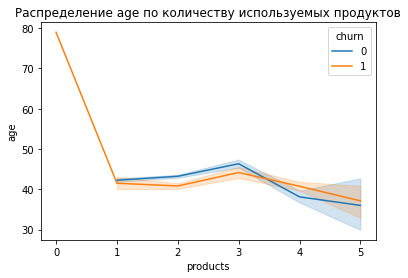

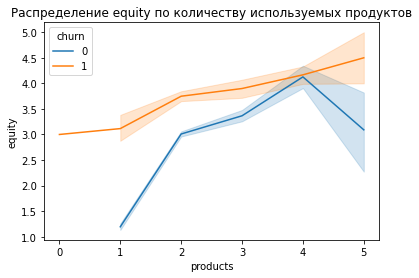

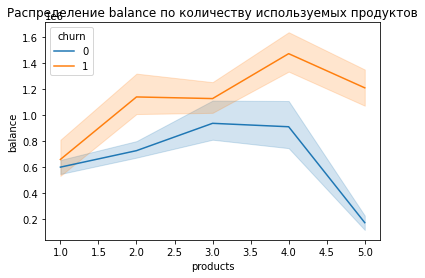

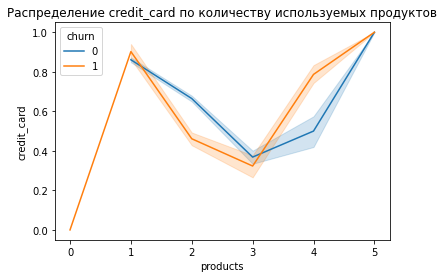

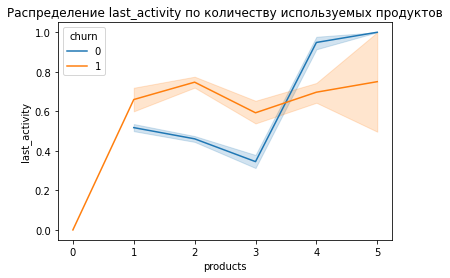

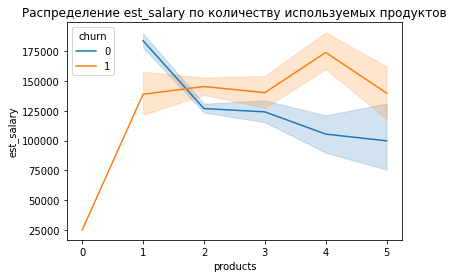

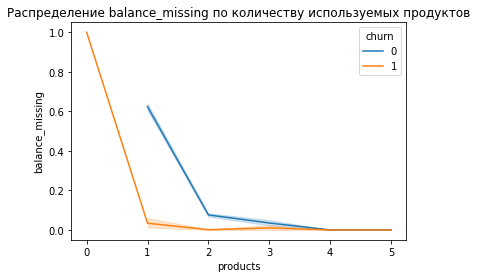

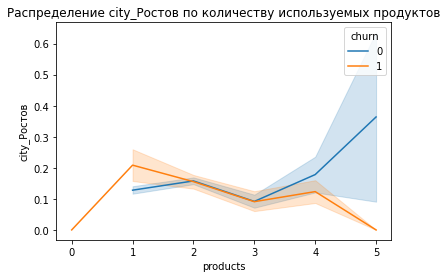

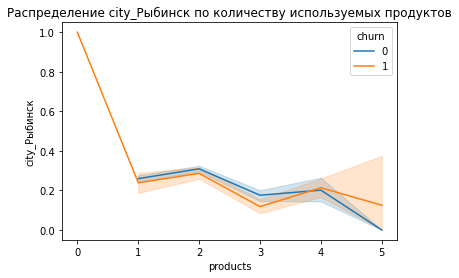

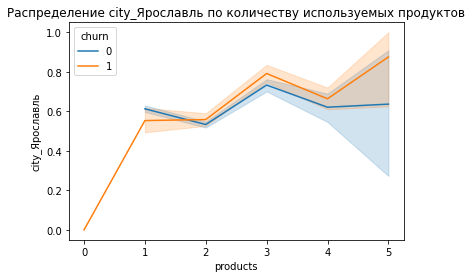

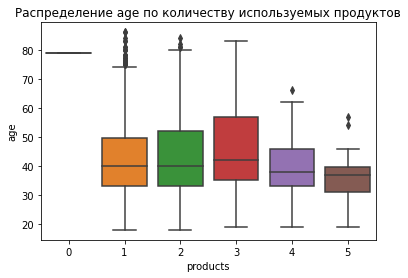

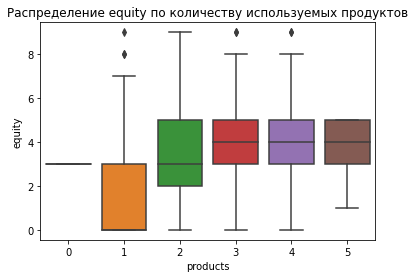

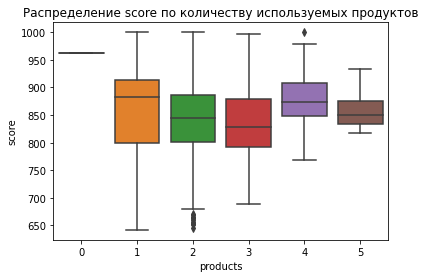

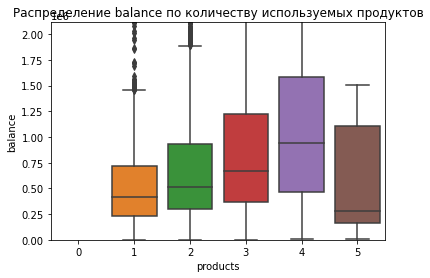

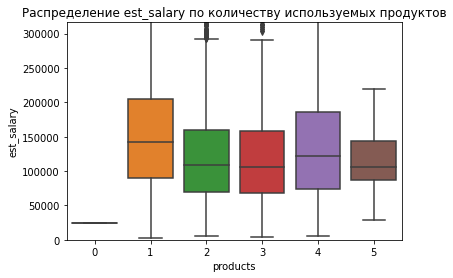

In [66]:
#нарисуем графики распределений
for column in filtered_data.drop(['userid', 'city', 'gender', 'churn','products'], axis=1).columns.values:
    sns.lineplot(y=column, x='products', hue='churn', data=filtered_data).set(
                                     title=f'Распределение {column} по количеству используемых продуктов');
    plt.show()
    
for column in ['age', 'equity', 'score', 'balance', 'est_salary']:
    # Создание графика boxplot 
    ax = sns.boxplot(x='products', y=filtered_data[column], data=filtered_data)
    ax.set(title=f'Распределение {column} по количеству используемых продуктов')
    
    # Устанавливаем ограничения для оси Y для 'balance' и 'est_salary'
    if column in ['balance', 'est_salary']:
        # Установка верхнего предела равного 95-му процентилю для больших значений
        upper_limit = filtered_data[column].quantile(0.95)
        ax.set_ylim(0, upper_limit)
    
    plt.show()

    

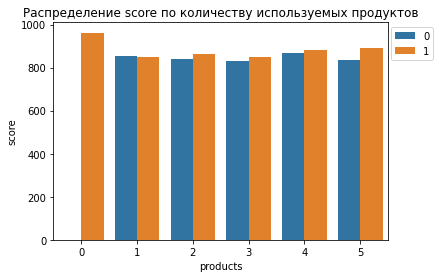

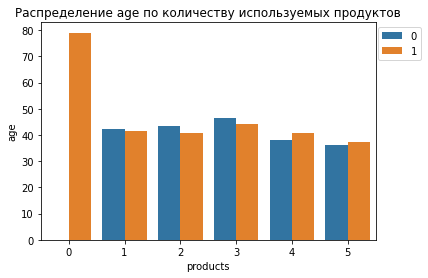

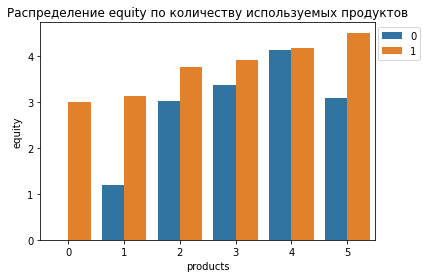

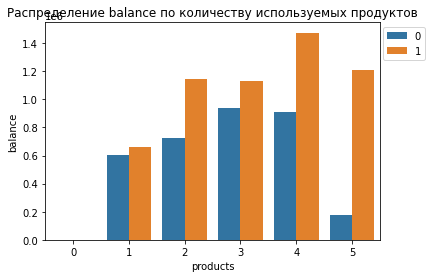

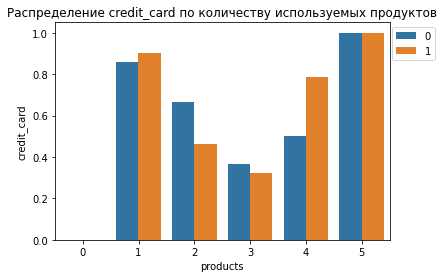

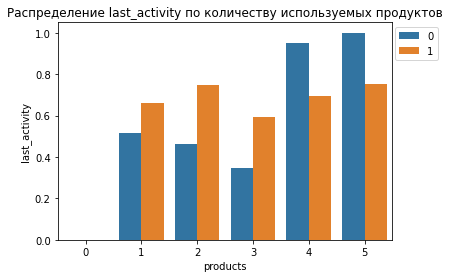

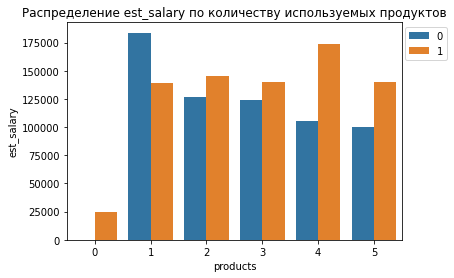

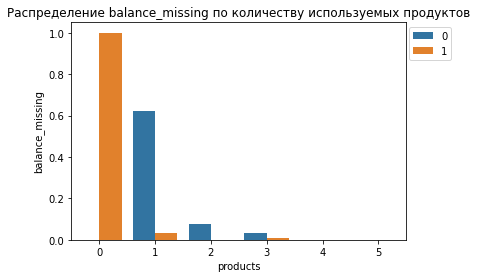

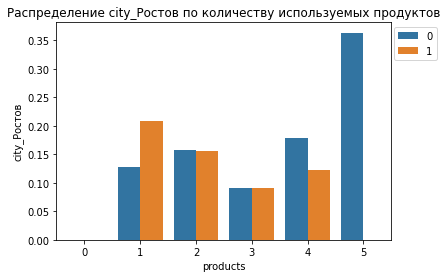

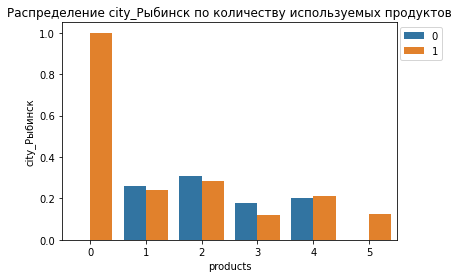

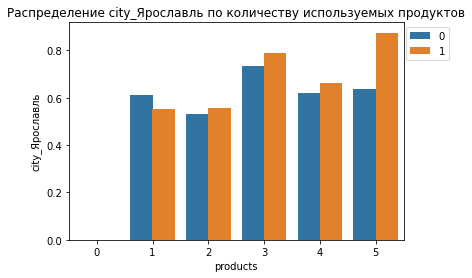

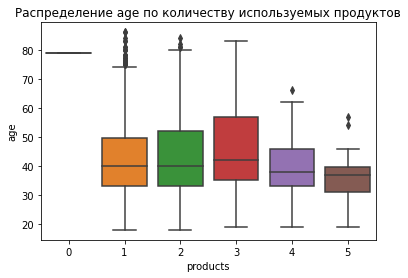

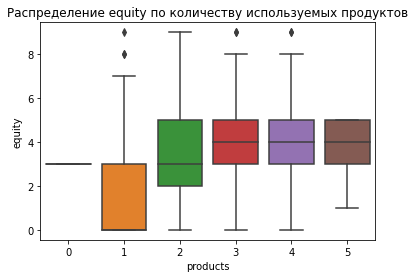

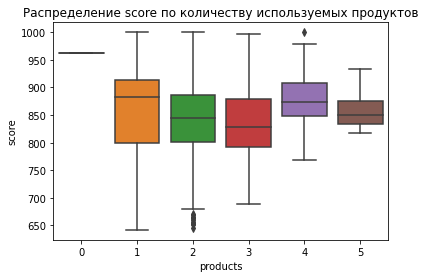

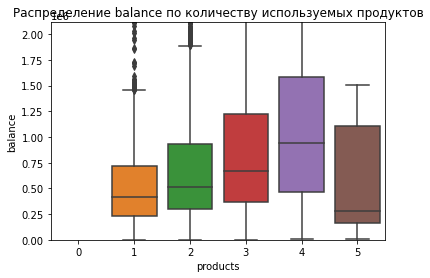

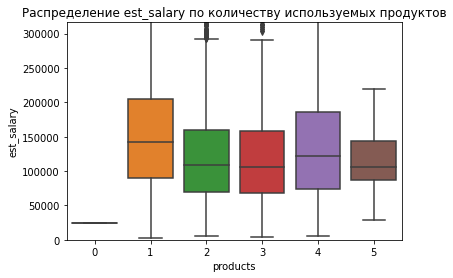

In [67]:
for column in filtered_data.drop(['userid', 'city', 'gender', 'churn', 'products'], axis=1).columns.values:
    plt.figure()  # Создание нового окна для каждого графика
    ax = sns.barplot(x='products', y=column, hue='churn', data=filtered_data, ci=None)
    ax.set(title=f'Распределение {column} по количеству используемых продуктов')
    plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))  # Вынесение легенды за пределы графика
    plt.show()
    
for column in ['age', 'equity', 'score', 'balance', 'est_salary']:
    # Создание графика boxplot 
    ax = sns.boxplot(x='products', y=filtered_data[column], data=filtered_data)
    ax.set(title=f'Распределение {column} по количеству используемых продуктов')
    
    # Устанавливаем ограничения для оси Y для 'balance' и 'est_salary'
    if column in ['balance', 'est_salary']:
        # Установка верхнего предела равного 95-му процентилю для больших значений
        upper_limit = filtered_data[column].quantile(0.95)
        ax.set_ylim(0, upper_limit)
    
    plt.show()




- у группы клиентов с оттоком (churn = 1) средний score имеет тенденцию возрастать с увеличением количества используемых продуктов, начиная с 1 до 5 продуктов. E группы клиентов без оттока (churn = 0) после сильного снижения score при переходе от 1 до 3 продуктов, наблюдается рост к 4, и резкое снижение к 5.
- виден большой разброс значений score у группы с оттоком при 4 и 5 продуктах => вероятно, указывает на неоднородность группы, наличие подгрупп с различными запросами и причинами неудовлетворенности
- в среднем менее возрастные клиенты склонны использовать большее разнообразие продуктов
- у обеих групп наблюдается увеличение баланса по мере увеличения количества используемых продуктов от 1 до примерно 3.
- клиенты без оттока имеют более низкий баланс по сравнению с клиентами, которые ушли, с увеличением количества продуктов разрыв между группами становится ещё более заметным
- у обеих групп роисходит снижение баланса при дальнейшем увеличении числа продуктов. Возможно, дополнительные продукты не привносят ожидаемой ценности (возможно, стоит пересмотреть или модифицировать предложения для клиентов при наличии более чем 3 продуктов, провести дополнительные опросы среди клиентов с 4 и 5 продуктами).
- значение equity растет до 4 продукта у обеих групп, затем падает к 5 продукту у неотточных и продолжает расти у отточных. Возможно, отток связан с тем, что пятый продукт связан с баллами капитала и не удовлетворяет ожиданий клиентов
- неотточные клиенты с 4 и 5 продуктами активны, у отточных большой разброс
- использование кредитной карты имеет V-образную динамику для обеих групп: сначала падение до 3 продуктов, а затем резкий подъем
- для обеих групп минимальное использование кредитной карты происходит при количестве использованных продуктов около трех. Нужен дополнительный анализ - какой предложенный продукт снижает зависимость от кредитов

<br>
=> акцентировать внимание на предложении, связанным с кредитными картами для удержания клиентов, учитывая положительную связь между использованием карточных продуктов и отсутствием оттока, разработать стимулы для повышения использования кредитных карт после покупки трех продуктов

In [68]:
churn_parts = filtered_data.groupby('products').agg({'userid': 'count','churn': 'sum'}).reset_index()
churn_parts['percent'] = round(churn_parts['churn']/churn_parts['userid']*100,2)
churn_parts

,products,userid,churn,percent
0,0,1,1,100.00000
1,1,3323,235,7.07000
2,2,5119,978,19.11000
3,3,1038,297,28.61000
4,4,474,300,63.29000
5,5,19,8,42.11000


Запись о нуле продуктов - одна.<br>
Массовые устойчивые сегменты: 1 и 2 продукта, наиболее рисковый - клиенты с 4 продуктами, за ними следует сегмент владельцев 5 продуктов и 3

In [69]:
filtered_data['age'].isna().sum()

0

<h2>Проверка статистических гипотез</h2>
<br>
- Сформулировать статистические гипотезы (нулевая и альтернативная)
- Выбрать и обосновать статистический критерий
- Выполнить проверку гипотез (сформулированных и также предзаданную гипотезу о влиянии возраста на отток по группам)
- Интерпретировать результат

In [71]:
#проверка количества данных на шаге
filtered_data.shape

(9974, 16)

<h4>Гипотеза о возрасте отточных и неотточных клиентов</h4>
H0: Возраст отточных клиентов не равен возрасту клиентов, остающихся в банке<br>
H1: Возраст отточных клиентов равен возрасту клиентов, остающихся в банке

In [72]:
g_churn = filtered_data[(filtered_data['churn']==1)]['age']
g_nochurn = filtered_data[(filtered_data['churn']==0)]['age']


Для проверки предложенной гипотезы о различии в возрастах отточных и неотточных клиентов можно использовать t-тест для независимых выборок, поскольку у нас есть две различные группы (отточные и неотточные клиенты), которые не пересекаются, и выборки достаточно большие, чтобы распределение средних значений выборок приближалось к нормальному даже в случае, если исходные данные не распределены нормально (согласно центральной предельной теореме). Кроме того, есть  основания полагать, что распределение возраста в каждой из групп удовлетворительно приближается к нормальному.

In [73]:
#проверка полноты данных
shape_of_data=len(g_churn)+len(g_nochurn)
print(shape_of_data)
if shape_of_data <9974:
    print('здесь данные утрачены')

9974


In [74]:
results = st.ttest_ind(g_churn, g_nochurn, equal_var=False)

alpha = 0.05

print(results.pvalue) 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

1.1721656853879547e-07
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу о том, что средний возраст ушедших и оставшихся клиентов одинаков: между средним возрастом этих двух групп существуют статистически значимые различия.


In [75]:
print(g_churn.median())
print(g_nochurn.median())

39.0
40.0


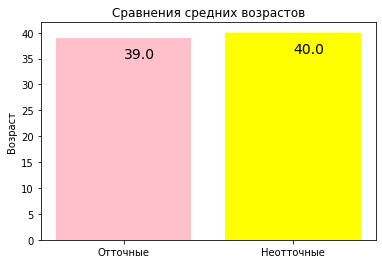

In [77]:
median_churn = g_churn.median()
median_nochurn = g_nochurn.median()

# Названия для каждого значения
labels = ['Отточные', 'Неотточные']

# Создание списка значений для построения графика
values = [median_churn, median_nochurn]

# Создание графика
fig, ax = plt.subplots()
ax.bar(labels, values, color=['pink', 'yellow'])

# Добавление заголовка и меток
ax.set_ylabel('Возраст')
ax.set_title('Сравнения средних возрастов')

# Отображение значений над столбцами
for i, v in enumerate(values):
    ax.text(i, v - 4, str(v), fontsize=14, color='black', ha='left')

# Показать график

plt.show()



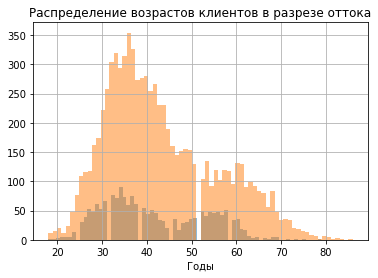

In [79]:
g_churn.hist(bins = 70, alpha=0.5)
g_nochurn.hist(bins = 70, alpha=0.5)
plt.title('Распределение возрастов клиентов в разрезе оттока')
plt.xlabel('Годы');

Отточные клиенты в среднем моложе и, видимо, более склонны к риску

<h4>Гипотеза о влиянии баланса на отток</h4>
- H0: Нет различий в средних значениях balance между группами с оттоком и без оттока.<br>
- H1: Средние значения balance различаются между группами с оттоком и без оттока.<br>
- U-тест Манна-Уитни.<br>
- Тест Левена <br>
Здесь так же  есть две различные группы (отточные и неотточные клиенты), которые не пересекаются, и выборки достаточно большие, чтобы распределение средних значений выборок приближалось к нормальному даже в случае, если исходные данные не распределены нормально (согласно центральной предельной теореме). Однако на графиках видно, что большинство значений сосредоточено в левой части графика, потом количество резко падает, и присутствует пик на уровне около 2 миллионов, то есть использование t-теста может быть некоректным. Используем тест Левена для проверки равенства дисперсий между группами и U-тест Манна-Уитни на равенство медиан, который не требует предположения о нормальности распределения данных.


In [80]:
#проверим на данных без пропусков
g_churn2 = filtered_data[(filtered_data['churn'] == 1)]['balance'].dropna() 
g_nochurn2 = filtered_data[(filtered_data['churn'] == 0)]['balance'].dropna()

# Проверка предпосылок для t-теста
levene_test = st.levene(g_churn2, g_nochurn2)
print(f"Levene test statistic: {levene_test.statistic}, p-value: {levene_test.pvalue}")

# Выполнение U-теста Манна-Уитни
u_statistic, p_value = st.mannwhitneyu(g_churn2, g_nochurn2, alternative='two-sided')

# Вывод результатов
print(f'U-Statistic: {u_statistic}')
print(f'P-Value: {p_value}')

# Интерпретация результатов
if p_value < 0.05:
    print("Отвергаем нулевую гипотезу: Средние значения баланса различаются между группами с оттоком и без оттока.")
else:
    print("Не отвергаем нулевую гипотезу: Нет достаточных доказательств различия в средних значениях баланса между группами.")


Levene test statistic: 27.6955929002035, p-value: 1.4581896896407983e-07
U-Statistic: 6784398.0
P-Value: 1.4891162831993242e-70
Отвергаем нулевую гипотезу: Средние значения баланса различаются между группами с оттоком и без оттока.


Есть статистически значимые различия между балансом группы, склонной к оттоку и группы, к нему не склонной. Видимо, баланс на счетах по-разному влияет на решение клиентов оставаться в банке или уходить (возможно, клиенты с большими остатками на счетах ищут более выгодные условия).

In [81]:
shape_of_data=len(g_churn2)+len(g_nochurn2)
print(shape_of_data)
print(filtered_data.shape)
if shape_of_data <9974:
    print('здесь данные утрачены')

7695
(9974, 16)
здесь данные утрачены


В этой части работы мы сравниваем между собой отточную и неотточную группы клиентов, для записей о которых существуют данные о балансе на счету. Однако исходные данные в датафрейме filtered_data сохранены и для других расчетов мы можем ими пользоваться.

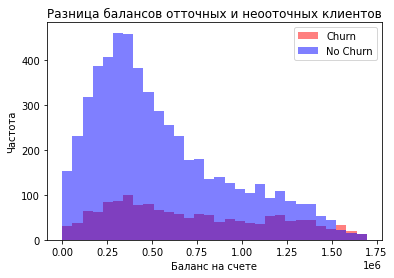

In [82]:
# Рассчитываем 95-й перцентиль для обоих наборов данных для ограничения верхнего лимита
upper_limit_churn = np.percentile(g_churn2, 95)
upper_limit_nochurn = np.percentile(g_nochurn2, 95)

# Используем минимальное значение максимумов перцентилей, чтобы учесть оба распределения наиболее справедливо
upper_limit = min(upper_limit_churn, upper_limit_nochurn)

# Отрисовка гистограмм с заданным лимитом
plt.hist(g_churn2, bins=30, alpha=0.5, label='Churn', color='red', range=(0, upper_limit))
plt.hist(g_nochurn2, bins=30, alpha=0.5, label='No Churn', color='blue', range=(0, upper_limit))

# Добавление названия графика и меток осей
plt.title('Разница балансов отточных и неооточных клиентов')
plt.xlabel('Баланс на счете')
plt.ylabel('Частота')

# Добавление легенды для различия гистограмм
plt.legend()

# Отображение графика
plt.show()


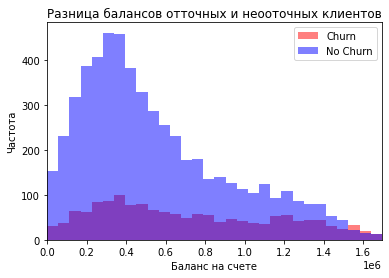

In [91]:
# Рассчитываем 95-й перцентиль для обоих наборов данных для ограничения верхнего лимита
upper_limit_churn = np.percentile(g_churn2, 95)
upper_limit_nochurn = np.percentile(g_nochurn2, 95)

# Используем минимальное значение максимумов перцентилей, чтобы учесть оба распределения наиболее справедливо
upper_limit = min(upper_limit_churn, upper_limit_nochurn)
plt.hist(g_churn2, bins=30, alpha=0.5, label='Churn', color='red', range=(0, upper_limit))
plt.hist(g_nochurn2, bins=30, alpha=0.5, label='No Churn', color='blue', range=(0, upper_limit))

# Нормирование графика
plt.xlim(0, upper_limit)

# Добавление названия графика и меток осей
plt.title('Разница балансов отточных и неооточных клиентов')
plt.xlabel('Баланс на счете')
plt.ylabel('Частота')

# Добавление легенды для различия гистограмм
plt.legend()

plt.show()


<h4>Гипотеза о связи между использованием продуктов и использованием кредитных карт</h4>
- H0: Нет корреляции между количеством используемых продуктов и использованием кредитной карты.<br>
- H1: Существует отрицательная корреляция между количеством используемых продуктов и использованием кредитной карты.<br>
- Статистический критерий: U-тест Манна-Уитни (поскольку данные - это дискретные величины): попробуем рассмотреть использование кредитной карты как две различные группы (есть кредитная карта и нет кредитной карты) и сравнить распределения количества продуктов между этими двумя группами.  

- В дополнение используем проверку коэффициентом Спирмена 


In [64]:
# Расчет корреляции Спирмена
correlation, p_value = st.spearmanr(filtered_data['products'], filtered_data['credit_card'], alternative='less')  # 'less' для теста на отрицательную корреляцию

# Вывод результатов
print(f"Spearman correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

# Интерпретация результата
if p_value < 0.05:
    print("Отвергаем нулевую гипотезу: Существует статистически значимая отрицательная корреляция между количеством используемых продуктов и использованием кредитной карты.")
else:
    print("Не отвергаем нулевую гипотезу: Нет достаточных доказательств наличия отрицательной корреляции между количеством используемых продуктов и использованием кредитной карты.")


Spearman correlation coefficient: -0.294011530467506
P-value: 2.2969702059205313e-198
Отвергаем нулевую гипотезу: Существует статистически значимая отрицательная корреляция между количеством используемых продуктов и использованием кредитной карты.


Spearman correlation coefficient: -0.294011530467506<br>
P-value: 2.2969702059205313e-198<br>
Отвергаем нулевую гипотезу: Существует статистически значимая отрицательная корреляция между количеством используемых продуктов и использованием кредитной карты.

In [65]:
#проверка объема данных
print(filtered_data.shape)


(9974, 16)


In [66]:
group_with_card = filtered_data[filtered_data['credit_card'] == 1]['products']
group_without_card = filtered_data[filtered_data['credit_card'] == 0]['products']

# Применяем тест Манна-Уитни
u_statistic, p_value = st.mannwhitneyu(group_with_card, group_without_card, alternative='two-sided')

# Вывод результатов
print(f"U-statistic: {u_statistic}")
print(f"P-value: {p_value}")

# Интерпретация результатов
if p_value < 0.05:
    print("Отвергаем нулевую гипотезу: Существует статистически значимое различие в количестве используемых продуктов между группами с кредитной картой и без.")
else:
    print("Не отвергаем нулевую гипотезу: Не найдено статистически значимых различий в количестве используемых продуктов между группами.")


U-statistic: 7240115.0
P-value: 1.7077049883336293e-189
Отвергаем нулевую гипотезу: Существует статистически значимое различие в количестве используемых продуктов между группами с кредитной картой и без.


- U-statistic: 7240115.0
- P-value: 1.7077049883336293e-189
- Отвергаем нулевую гипотезу: Существует статистически значимое различие в количестве используемых продуктов между группами с кредитной картой и без.

Отвергаем нулевую гипотезу: существует отрицательная корреляция. С увеличением количества используемых продуктов, вероятность использования кредитной карты уменьшается. Клиенты, использующие больше банковских продуктов, склонны реже использовать кредитные карты. Это может быть связано с тем, что эти клиенты могут находить другие финансовые инструменты более подходящими или выгодными для их нужд или что они стараются избегать использования кредита. Возможно, клиенты нуждаются в дополнительном обучении относительно преимуществ использования кредитных карт при одновременном использовании других продуктов банка.<br>
может быть, стоит разработать персонализированные предложения для клиентов, которые предпочитают не использовать кредитные карты, но активно пользуются другими банковскими продуктами.


In [67]:
shape_of_data=len(group_with_card)+len(group_without_card)
print(shape_of_data)
print(filtered_data.shape)
if shape_of_data <9974:
    print('здесь данные утрачены')

9974
(9974, 16)


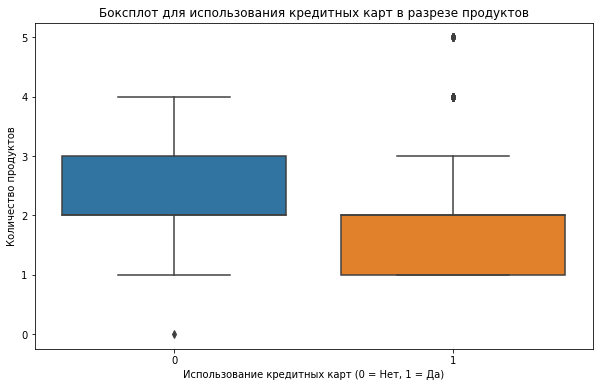

In [68]:

# построим график распределения количества продуктов среди пользователей с кредитными картами и без. 
#Если различия в медианах или квартилях видны и значимы, это подтвердит результаты теста Спирмена о наличии отрицательной корреляции.

plt.figure(figsize=(10, 6))
sns.boxplot(x='credit_card', y='products', data=filtered_data)
plt.title('Боксплот для использования кредитных карт в разрезе продуктов')
plt.xlabel('Использование кредитных карт (0 = Нет, 1 = Да)')
plt.ylabel('Количество продуктов')

plt.show()



In [98]:
# Создаём нормированные данные
data_cred_part = filtered_data.groupby('products')['credit_card'].agg(['sum','count']).reset_index().rename(columns={'sum':'количество кредиток','count':'всего'})
data_cred_part['part'] = data_cred_part['количество кредиток']/data_cred_part['всего']


   products  количество кредиток  всего    part
0         0                    0      1 0.00000
1         1                 2870   3323 0.86368
2         2                 3203   5119 0.62571
3         3                  369   1038 0.35549
4         4                  323    474 0.68143


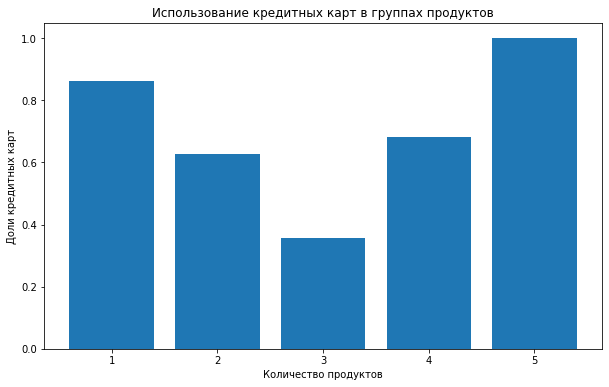

In [103]:
#уберем группу с нулем продуктов (очевидно, что при нуде продуктов кредитной карты среди них быть не может)
data_cred_part = data_cred_part.drop(data_cred_part[data_cred_part['part'] == 0].index)

#построим график
plt.figure(figsize=(10, 6))
plt.bar(data_cred_part['products'], data_cred_part['part'])

plt.title('Использование кредитных карт в группах продуктов')
plt.xlabel('Количество продуктов')
plt.ylabel('Доли кредитных карт')

plt.show()


<h4>Гипотеза о влиянии наличия кредитной карты на отток</h4>
- H0: Нет различий в средних значениях credit_card между группами с оттоком и без оттока.<br>
- H1: Средние значения credit_card различаются между группами с оттоком и без оттока.<br>
- Статистический критерий: z-тест для проверки долей (поскольку переменная credit_card является бинарной (0 или 1), что представляет собой данные категориального типа; сравним доли наличия кредитных карт между группами с оттоком и без оттока - проверка равенства пропорций)


In [69]:
g_churn3 = filtered_data[filtered_data['churn'] == 1]['credit_card']
g_nochurn3 = filtered_data[filtered_data['churn'] == 0]['credit_card']

# Количество успехов (кредитных карт)
count = np.array([g_churn3.sum(), g_nochurn3.sum()])

# Количество наблюдений в каждой группе
nobs = np.array([g_churn3.count(), g_nochurn3.count()])

# Выполнение Z-теста
stat, p_value = proportions_ztest(count, nobs)

# Расчет и вывод долей
proportion_churn = count[0] / nobs[0]
proportion_nochurn = count[1] / nobs[1]
difference_in_proportions = proportion_nochurn - proportion_churn

# Установка уровня значимости
alpha = 0.05

# Вывод результатов
print("P-value: {:.2e}".format(p_value))
print(f"Доля клиентов с кредитной картой среди ушедших: {proportion_churn:.4f}")
print(f"Доля клиентов с кредитной картой среди оставшихся: {proportion_nochurn:.4f}")
print(f"Разница в долях между группами: {difference_in_proportions:.4f}")

# Проверка гипотезы
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: Существует статистически значимое различие в долях использования кредитных карт между группами.")
else:
    print("Не получилось отвергнуть нулевую гипотезу: Доли использования кредитных карт схожи между группами.")


P-value: 9.19e-39
Доля клиентов с кредитной картой среди ушедших: 0.5514
Доля клиентов с кредитной картой среди оставшихся: 0.7089
Разница в долях между группами: 0.1575
Отвергаем нулевую гипотезу: Существует статистически значимое различие в долях использования кредитных карт между группами.


P-value: 9.19e-39
- Отвергаем нулевую гипотезу: Существует статистически значимое различие в долях использования кредитных карт между группами.
- Доля клиентов с кредитной картой среди ушедших: 0.5514
- Доля клиентов с кредитной картой среди оставшихся: 0.7089
- Разница в долях между группами: 0.1575


In [70]:
shape_of_data=len(g_churn3)+len(g_nochurn3)
print(shape_of_data)
print(filtered_data.shape)
if shape_of_data <9974:
    print('здесь данные утрачены')

9974
(9974, 16)


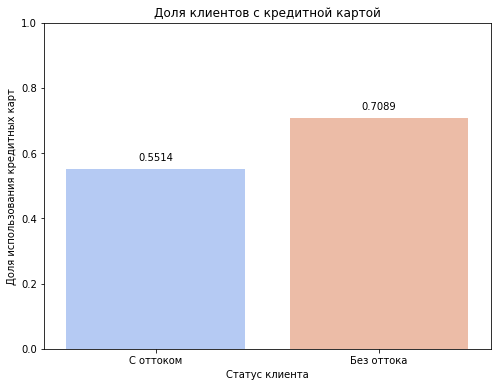

In [71]:
# построим визуализацию
categories = ['С оттоком', 'Без оттока']
values = [proportion_churn, proportion_nochurn]
plt.figure(figsize=(8, 6))
sns.barplot(x=categories, y=values, palette='coolwarm')
plt.title('Доля клиентов с кредитной картой')
plt.ylabel('Доля использования кредитных карт')
plt.xlabel('Статус клиента')

# Добавление текста на столбцы
for i, value in enumerate(values):
    plt.text(i, value + 0.02, f'{value:.4f}', ha='center', va='bottom')

# Показать график
plt.ylim(0, 1)  # Установка пределов оси Y для лучшей читабельности
plt.show()


<h4> Гипотеза о влиянии количества продуктов на отток</h4>
- H0: Нет различий в средних значениях products между группами с оттоком и без оттока. <br>
- H1: Средние значения products различаются между группами с оттоком и без оттока.<br>
- Статистический критерий: t-тест для независимых выборок. Учитывая, что переменная products является дискретной и принимает ограниченное количество значений (от 0 до 5), а размеры выборок достаточно велики (1819 и 8155 соответственно), использование t-теста для независимых выборок оказывается адекватным. При больших размерах выборок распределение средних будет приближаться к нормальному, даже если исходное распределение отлично от нормального. Это делает t-тест применимым в данном контексте. Обе выборки достаточно велики, чтобы снизить влияние асимметрии и экстремальных значений, которые могут быть в данных.

In [72]:
g_churn4 = filtered_data[filtered_data['churn'] == 1]['products']
g_nochurn4 = filtered_data[filtered_data['churn'] == 0]['products']

# Проверяем размер выборок
print(f"Размер выборки группы с оттоком: {len(g_churn4)}")
print(f"Размер выборки группы без оттока: {len(g_nochurn4)}")

# t-тест для независимых выборок
t_stat, p_value = st.ttest_ind(g_churn4, g_nochurn4, equal_var=False) 

# Вывод результатов
print(f"Результат t-теста: t-statistic = {t_stat:.3f}, p-value = {p_value:.4e}")
if p_value < 0.05:
    print("Отвергаем нулевую гипотезу: существует статистически значимое различие в средних значениях products между группами.")
else:
    print("Не отвергаем нулевую гипотезу: статистически значимых различий в средних значениях products между группами нет.")


Размер выборки группы с оттоком: 1819
Размер выборки группы без оттока: 8155
Результат t-теста: t-statistic = 26.771, p-value = 7.5375e-138
Отвергаем нулевую гипотезу: существует статистически значимое различие в средних значениях products между группами.


Отвергаем нулевую гипотезу о том, что нет различий в средних значениях продуктов между этими группами. 

Количество используемых банковских продуктов статистически значимо различается между клиентами, которые покидают банк, и теми, кто остаётся. Это может свидетельствовать о том, что вид и количество предоставляемых банковских продуктов оказывают влияние на решение клиентов о продолжении отношений с банком. Банку, возможно, стоит уделить внимание управлению продуктовым портфолио и улучшению качества обслуживания по каждому продукту, чтобы снизить уровень оттока клиентов.


In [73]:
shape_of_data=len(g_churn4)+len(g_nochurn4)
print(shape_of_data)
print(filtered_data.shape)
if shape_of_data <9974:
    print('здесь данные утрачены')

9974
(9974, 16)


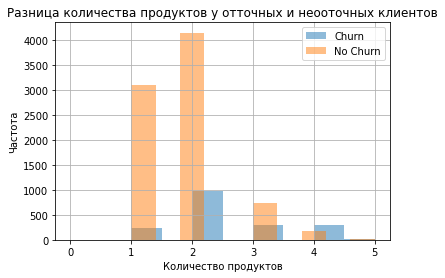

In [74]:
g_churn4.hist(bins = 10, alpha=0.5, label='Churn')
g_nochurn4.hist(bins = 10, alpha=0.5, label='No Churn')
# Добавление названия графика и меток осей
plt.title('Разница количества продуктов у отточных и неооточных клиентов')
plt.xlabel('Количество продуктов')
plt.ylabel('Частота')

# Добавление легенды для различия гистограм
plt.legend();

<h4>Гипотеза о различии использования кредитных карт в группах продуктов</h4>

Нулевая гипотеза (H0):
Пропорция клиентов, использующих кредитную карту среди тех, кто использует два продукта, равна пропорции клиентов, использующих кредитную карту среди тех, кто использует другое количество продуктов. 

Альтернативная гипотеза (H1):
Пропорция клиентов, использующих кредитную карту среди тех, кто использует два продукта, отличается от пропорции клиентов, использующих кредитную карту среди тех, кто использует другое количество продуктов.


Используем Z-тест для пропорций

In [75]:
# Выборка для клиентов с двумя продуктами и с другим кол-вом продуктов
two_products = filtered_data[filtered_data['products'] == 2]['credit_card']
not_two_products = filtered_data[filtered_data['products'] != 2]['credit_card']

# Расчет пропорции клиентов с кредитной картой в каждой группе
prop_two = two_products.mean()
prop_not_two = not_two_products.mean()

# Расчет общего количества клиентов в каждой группе
n_two = len(two_products)
n_not_two = len(not_two_products)

# Расчет z-статистики и p-value
from statsmodels.stats.proportion import proportions_ztest
count = np.array([two_products.sum(), not_two_products.sum()])
nobs = np.array([n_two, n_not_two])
stat, pval = proportions_ztest(count, nobs)

print(f'Пропорция с кредитными картами среди клиентов с двумя продуктами: {prop_two:.2f}')
print(f'Пропорция с кредитными картами среди клиентов с другим количеством продуктов: {prop_not_two:.2f}')
print(f'Z-statistic: {stat:.2f}, p-value: {pval:.3f}')

# Ответственное принятие решений на основе полученных результатов
alpha = 0.05
if pval < alpha:
    print("Отвергаем нулевую гипотезу: существуют статистически значимые различия в пропорциях.")
else:
    print("Не отвергаем нулевую гипотезу: статистически значимых различий в пропорциях нет.")


Пропорция с кредитными картами среди клиентов с двумя продуктами: 0.63
Пропорция с кредитными картами среди клиентов с другим количеством продуктов: 0.74
Z-statistic: -11.97, p-value: 0.000
Отвергаем нулевую гипотезу: существуют статистически значимые различия в пропорциях.


Отвергаем нулевую гипотезу: существуют статистически значимые различия в пропорциях.

- Среди клиентов, использующих два продукта, пропорция тех, кто имеет кредитные карты, составляет 0.63.
- Среди клиентов, использующих не два продукта, пропорция тех, кто имеет кредитные карты, составляет 0.69.

Клиенты, использующие не два продукта, чаще имеют кредитные карты, чем те, кто использует ровно два продукта.

Банку стоит рассмотреть возможности для улучшения предложений и услуг для клиентов, использующих другое количество продуктов, возможно, интегрируя более выгодные условия по кредитным картам или комбинируя их с другими продуктами, чтобы стимулировать большее их использование.


In [76]:
shape_of_data=len(two_products)+len(not_two_products)
print(shape_of_data)
print(filtered_data.shape)
if shape_of_data <9974:
    print('здесь данные утрачены')

9974
(9974, 16)


### Промежуточный итог
Вычленить ключевые признаки, на основе которых следует строить стратегию воздействия на клиентов в различных сегментах.
Сформулировать промежуточный итог


Ключевые признаки для стратегии воздействия на клиентов:

1. Количество банковских продуктов: Как основной показатель, влияющий на отток и удержание клиентов. В частности, один и два продукта являются наиболее стабильными сегментами.

2. Использование кредитных карт: Динамика использования кредитных карт показывает, что у клиентов с тремя продуктами - минимальное использование, что может говорить о потенциале для продвижения кредитных продуктов в этой группе.

3. Возраст клиентов: Молодые клиенты склонны к большему риску и использованию разнообразных продуктов, что предполагает разработку персонализированных предложений для этой категории.

4. Баланс на счетах: Статистически значимые различия в балансах между группами с оттоком и без указывают на необходимость разработки стратегий для управления большими остатками на счетах, возможно, через инвестиционные продукты или льготные условия хранения средств.

Промежуточный итог и стратегические предложения:

1. Удержание и развитие: На основе анализа клиентов с одним и двумя продуктами, стоит сосредоточить усилия на их дополнительном удержании и развитии. Учитывать их текущие потребности и предложить улучшенные условия или новые продукты, которые могут поддержать их лояльность.

2. Персонализированные предложения: Для клиентов, использующих три и более продукта, необходимо провести дополнительные исследования для понимания их нужд и причин оттока. Возможно, следует разработать специализированные предложения, которые могут предложить дополнительную ценность этим клиентам.

3. Образовательные программы: Для клиентов, которые редко используют кредитные карты, стоит запустить программы, которые подчеркивают преимущества и удобство использования кредитных карт в сочетании с другими банковскими продуктами.

4. Анализ и сегментация по возрасту и балансу: Молодые клиенты и клиенты с большими балансами требуют особого внимания в контексте риск-менеджмента и маркетингового взаимодействия, чтобы предложить им максимально выгодные условия и предотвратить отток.

5. Динамика использования кредитных карт: Важно промоутить использование кредитных карт, так как это поведение показывает значимую связь с оттоком и лояльностью клиентов.


In [77]:
print(filtered_data.shape)

(9974, 16)


### Сегментация на основе выделенных показателей
Найти приоритетные сегменты клиентов<br>
Посчитать ключевые показатели по этим сегментам<br>
Выделить приоритетные для работы сегменты клиентов<br>


<h2>Классификация клиентов</h2>

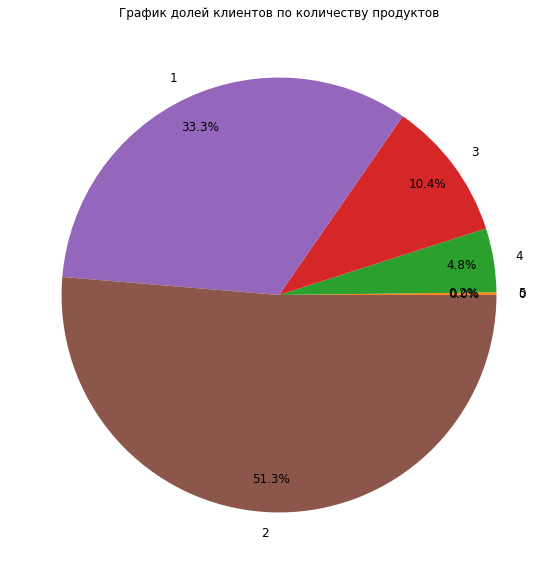

In [78]:
#еще раз выведем график долей
fig, ax1 = plt.subplots(figsize=(10, 10))
ax1.pie(product_group.values, labels = product_group.index, autopct='%1.1f%%', textprops={'fontsize':12}, pctdistance=0.85, )
plt.title('График долей клиентов по количеству продуктов')
plt.show()

Основная масса пользуется 1 или 2 продуктами

In [79]:
# посчитаем отток в каждой группе
churn_part = filtered_data.groupby('products')\
  .agg({'userid': 'count', 'churn': 'mean'})\
  .sort_values(by='churn', ascending=False)\
  .rename(columns={'userid': 'Число клиентов', 'churn': 'Доля отточных клиентов'})\
  .style.format({'Доля отточных клиентов': '{:.2%}'})\
  
display(churn_part)

,Число клиентов,Доля отточных клиентов
products,,
0,1,100.00%
4,474,63.29%
5,19,42.11%
3,1038,28.61%
2,5119,19.11%
1,3323,7.07%


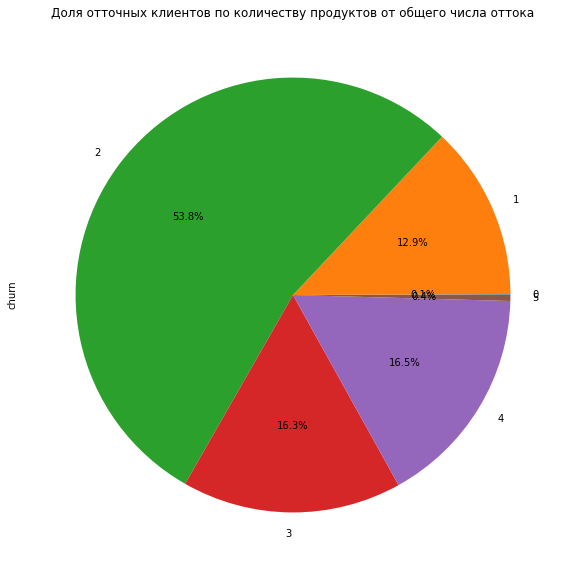

In [80]:
# посчитаем долю ушедших клиентов от общего числа оттока по  количеству потребляемых продуктов
grouped_churn = filtered_data.groupby('products')['churn'].sum() / filtered_data['churn'].sum()*100
grouped_churn.plot.pie(autopct='%.1f%%', 
                                       figsize=(10,10))
plt.title('Доля отточных клиентов по количеству продуктов от общего числа оттока')


plt.show()

Высокорисковые сегменты: 4	- 	63.29% и 5	-	42.11%
Самый большой сегмент - 2 продукта, ушедшие в нем 19.11% составляют самую крупную долю в общем оттоке

In [81]:
# посмотрим на процент оттока по городам
filtered_data.groupby(['city'])\
  .agg({'userid': 'count', 'churn': 'mean'})\
  .sort_values(by='churn', ascending=False)\
  .rename(columns={'userid': 'Клиентов', 'churn': 'Доля оттока'})\
  .style.format({'Доля оттока': '{:.2%}'})\
  

,Клиентов,Доля оттока
city,,
Ярославль,5875,19.01%
Ростов,1416,18.71%
Рыбинск,2683,16.29%


Рыбинск теряет меньше всего клиентов, Ярославль - больше всего, однако различия невелики

In [82]:
filtered_data.columns

Index(['userid', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn',
       'balance_missing', 'city_Ростов', 'city_Рыбинск', 'city_Ярославль'],
      dtype='object')

In [83]:

print(filtered_data.shape)


(9974, 16)


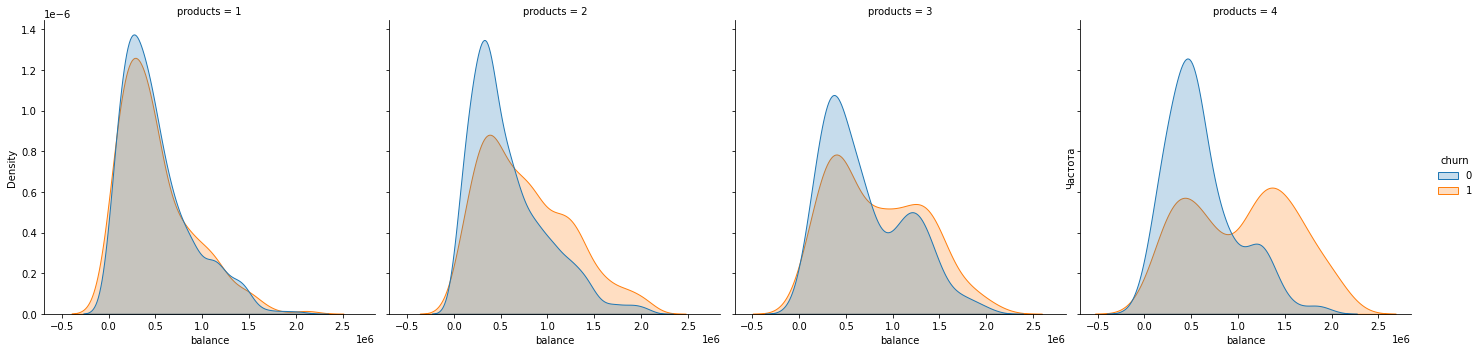

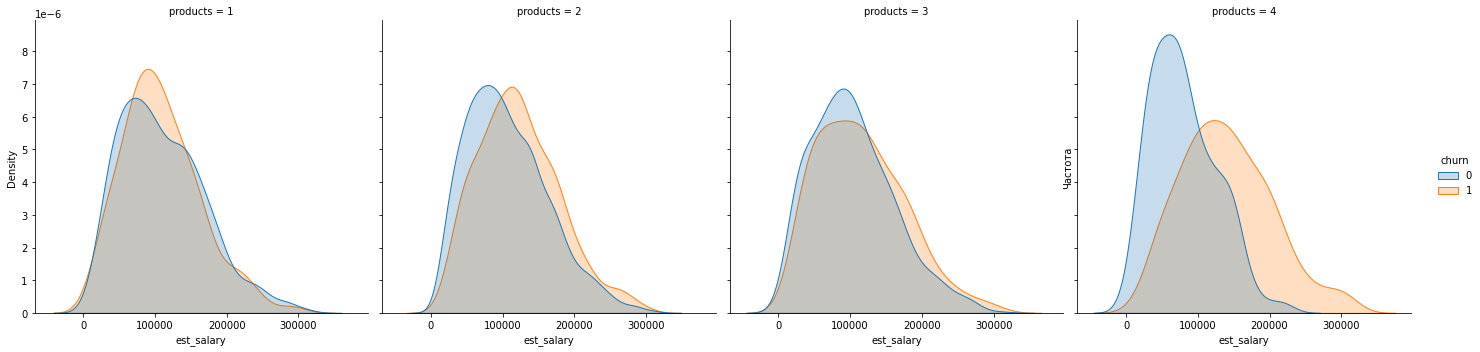

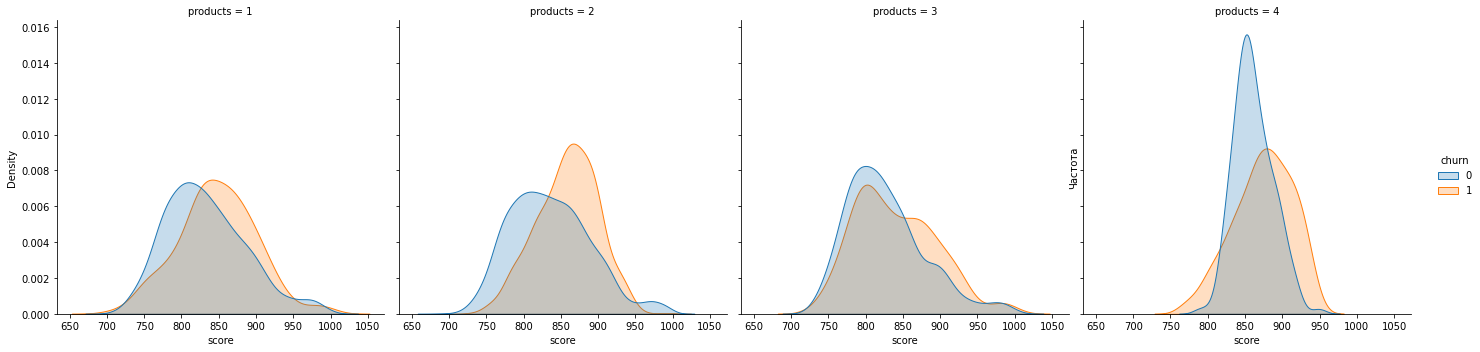

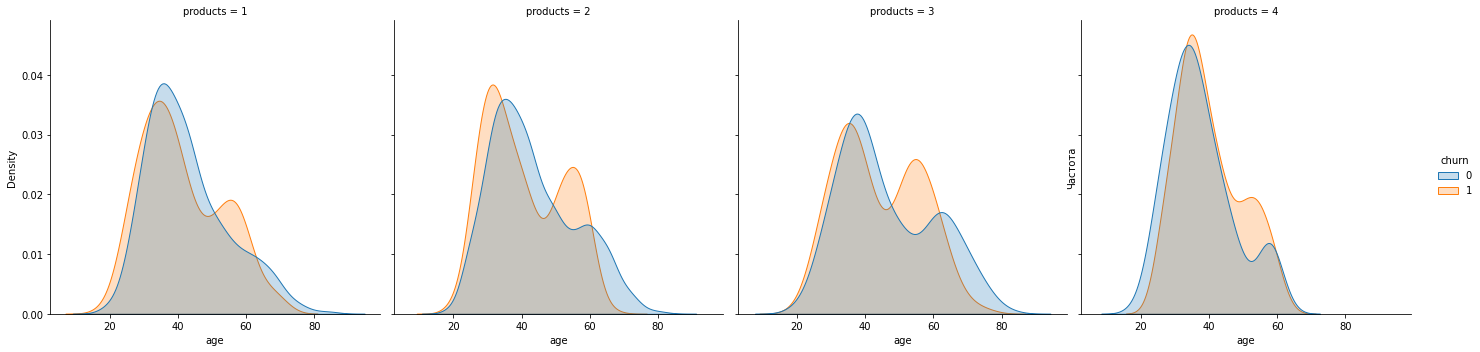

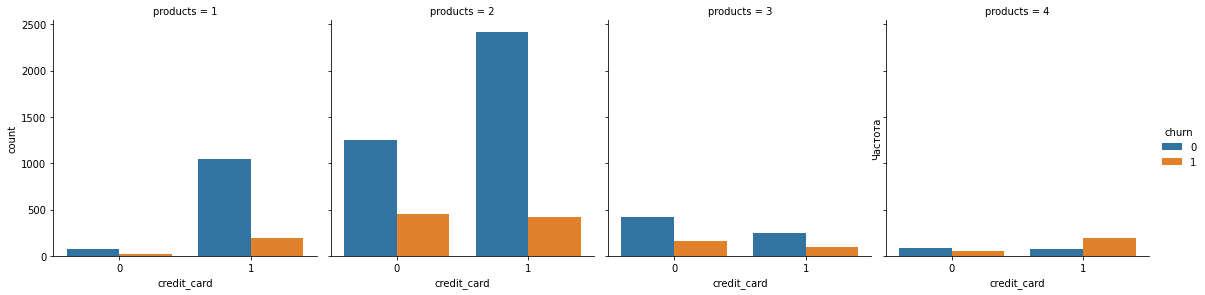

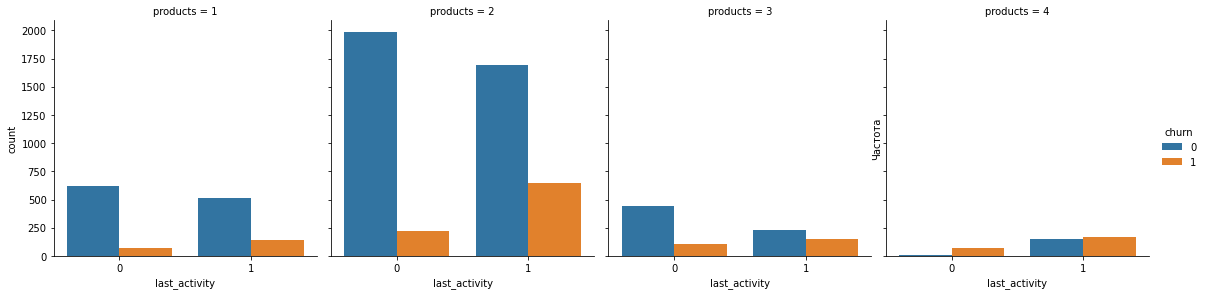

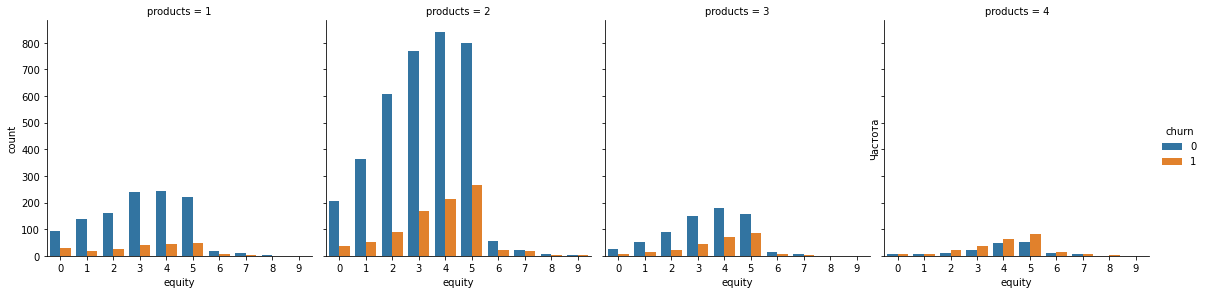

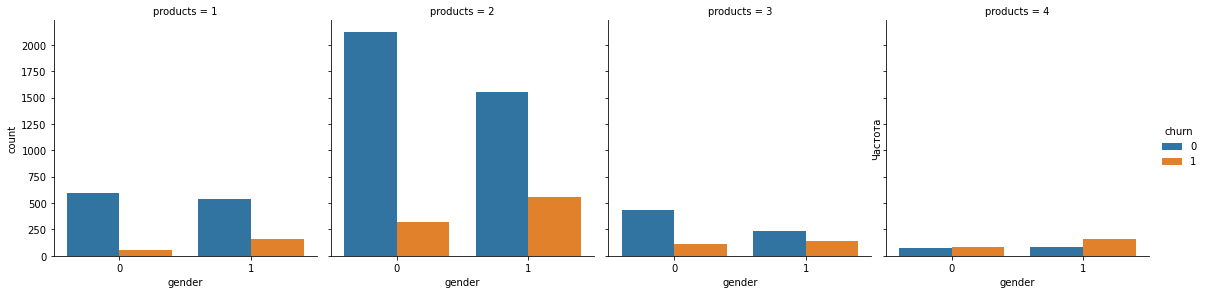

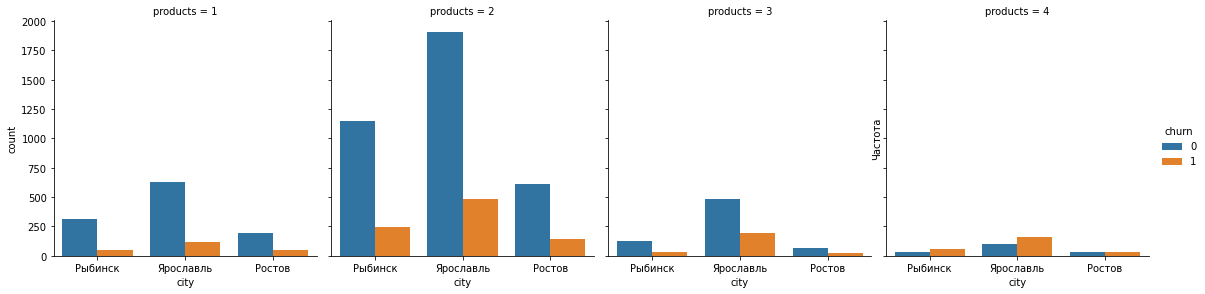

In [84]:
#исключим из вывода на графиках запись с нулем продуктов
#исключим экстремальные выбросы по balance и est_salary дл наглядности
#используем разные типы графиков для разных типов данных для наглядности и точности

# Исключаем продукты с 0 и 5 (1 и 19 записей - этого слишком мало), оставив только репрезентативные выборки
filtered_data_for_grafics = filtered_data[(filtered_data['products'] != 0) & (filtered_data['products'] != 5)]

# Устанавливаем максимальные ограничения для balance и est_salary
max_balance_limit = filtered_data_for_grafics['balance'].quantile(0.95)  # 95-й процентиль
max_salary_limit = filtered_data_for_grafics['est_salary'].quantile(0.95)

filtered_data_for_grafics = filtered_data_for_grafics[(filtered_data_for_grafics['balance'] <= max_balance_limit) & (filtered_data_for_grafics['est_salary'] <= max_salary_limit)]


# Разделяем переменные по типам
continuous_vars = ['balance', 'est_salary', 'score',  'age']
discrete_vars = ['credit_card', 'last_activity', 'equity','gender' ]
categorical_vars = ['city']

# Визуализация для непрерывных переменных
for var in continuous_vars:
    sns.displot(data=filtered_data_for_grafics, x=var, kind='kde', col='products', hue='churn', fill=True, common_norm=False)
    plt.ylabel('Частота')
    plt.show()

# Визуализация для дискретных переменных
for var in discrete_vars:
    sns.catplot(data=filtered_data_for_grafics, x=var, kind='count', col='products', hue='churn', height=4, aspect=1)
    plt.ylabel('Частота')
    plt.show()

# Визуализация для категориальных переменных
for var in categorical_vars:
    sns.catplot(data=filtered_data_for_grafics, x=var, kind='count', col='products', hue='churn', height=4, aspect=1)
    plt.ylabel('Частота')
    plt.show()


### Анализ по продуктам:

1. Один продукт и баланс:
   - График остающихся клиентов смещен вправо относительно графика ушедших, имеет более широкое распределение с пиком приблизительно 250-300 тыс. Ушедшие клиенты имеют пик ниже 200.
2. Два продукта и баланс:
   - Ситуация меняется: график остающихся смещен влево относительно графика уходящих, острый пик в районе 300 тысяч, график уходящих имеет плато между 200 и 500. Сегмент выглядит стабильным, уменьшение в оттоке

3. Три продукта и баланс:
   - Сохраняется тенденция. Большинство клиентов с тремя продуктами остались с банком, пик остающихся в районе 300 тысяч.
   - Распределение баланса для оставшихся клиентов сильно схоже с распределением при двух продуктах.

4. Четыре продукта и баланс:
   - Снова появление значительной доли оттока. Оранжевая кривая (ушедшие) незначительно смещена вправо по сравнению с синей, что указывает на наличие более высоких балансов у ушедших клиентов.
   - Два пика уходящих: около 300 и около 500
   - Остающиеся имеют также два пика: около 150 и около 500
   - Сегмент выглядит менее стабильным
   
5. Четыре продукта и оценочный доход:
   - Значительный отток клиентов с четвертым продуктом, где оранжевая кривая заметно выше синей, особенно в диапазоне около 100000. Это указывает на повышенную вероятность оттока среди клиентов с более высоким окладом.
   
6. Три продукта и кредитный скор:
   - Здесь мы видим, что оранжевая кривая (ушедшие) становится меньше выраженной по сравнению с другими графиками. Это означает, что с указанным количеством продуктов отток клиентов значительно ниже, несмотря на схожесть в распределении кредитных рейтингов.
7. Четыре продукта и скор:
   - У клиентов с четыремя продуктами наблюдается значительно увеличившийся отток , при этом пик кредитного рейтинга около 850.
   
8. Кредитные карты и отток
- Стабильность при двух и трех продуктах: Клиенты с тремя продуктами показывают низкий уровень оттока.
   
- Проблемы c четырьмя продуктами.



### Выводы и рекомендации:
- Роль количества продуктов: Наличие 1, 2 и особенно 3 продуктов связано с более высокой долей удержания клиентов. 3 продукта кажется оптимальным предложением, с наименьшим уровнем оттока,  при 4 продуктах отток значительно возрастает.
- Проблемы баланса и продуктов: Более высокие балансы среди ушедших клиентов, особенно с 1 и 4 продуктами, могут указывать на требовательность в управлении этими счетами или недостаточность предоставляемых услуг.

- Четвертый продукт - фактор риска: Отчетливо заметная тенденция к оттоку среди клиентов, использующих четыре продукта, что может указывать на неудовлетворенность или проблемы, связанные именно с этим количеством продуктов. Наблюдаемая большая плотность ушедших клиентов с четырьмя продуктами по сравнению с тремя или меньшим количеством подразумевает, что эта категория может нуждаться в дополнительном анализе и пересмотре предложений.
- Стабильность при трех продуктах: Очень низкая доля оттока среди клиентов с тремя продуктами, что делает это число продуктов наиболее удачным предложением из-за стабильности и удовлетворенности клиентов.
- Анализ потребностей старших клиентов: изучить потребности и предпочтения старших возрастных групп, особенно тех, кто использует один и четыре продукта.
- Анализ потребностей младших клиентов: изучить потребности и предпочтения младших возрастных групп, особенно тех, кто использует четыре продукта.



In [85]:
#посмотрим на среднее значение всех признаков в разрезе количества продуктов
filtered_data.drop(['userid', 'balance_missing'], axis=1).groupby(by='products').mean()

,score,gender,age,equity,balance,credit_card,last_activity,est_salary,churn,city_Ростов,city_Рыбинск,city_Ярославль
products,,,,,,,,,,,,
0,962.00000,0.00000,79.00000,3.00000,NaN,0.00000,0.00000,25063.96000,1.00000,0.00000,1.00000,0.00000
1,854.29522,0.54048,42.19621,1.32982,611006.19721,0.86368,0.52754,180605.23382,0.07072,0.13361,0.25790,0.60849
2,844.55851,0.47724,42.76890,3.15062,812151.99777,0.62571,0.51553,130400.37875,0.19105,0.15726,0.30475,0.53800
3,837.23988,0.43064,45.71484,3.51830,993888.29762,0.35549,0.41618,128697.00665,0.28613,0.09152,0.15896,0.74952
4,878.26793,0.62236,39.78270,4.15190,1267820.57458,0.68143,0.78903,148788.95287,0.63291,0.14346,0.20886,0.64768
5,859.26316,0.52632,36.47368,3.68421,610986.63368,1.00000,0.89474,116652.05105,0.42105,0.21053,0.05263,0.73684


In [86]:

filtered_data.shape

(9974, 16)

In [87]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9974 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userid           9974 non-null   int64  
 1   score            9974 non-null   float64
 2   city             9974 non-null   object 
 3   gender           9974 non-null   int64  
 4   age              9974 non-null   float64
 5   equity           9974 non-null   int64  
 6   balance          7695 non-null   float64
 7   products         9974 non-null   int64  
 8   credit_card      9974 non-null   int64  
 9   last_activity    9974 non-null   int64  
 10  est_salary       9974 non-null   float64
 11  churn            9974 non-null   int64  
 12  balance_missing  9974 non-null   int64  
 13  city_Ростов      9974 non-null   uint8  
 14  city_Рыбинск     9974 non-null   uint8  
 15  city_Ярославль   9974 non-null   uint8  
dtypes: float64(4), int64(8), object(1), uint8(3)
memory usage: 1

### Общая кластеризация клиентов банка

Основываясь на выводах, сделанных выше, проведем сегментацию клиентов банка

In [88]:
#для выделения кластера и чтобы избежать потери данных заполним пропуски в балансе значением, которого нет в таблице
filtered_data['balance'] = filtered_data['balance'].fillna(-1)

In [89]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9974 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userid           9974 non-null   int64  
 1   score            9974 non-null   float64
 2   city             9974 non-null   object 
 3   gender           9974 non-null   int64  
 4   age              9974 non-null   float64
 5   equity           9974 non-null   int64  
 6   balance          9974 non-null   float64
 7   products         9974 non-null   int64  
 8   credit_card      9974 non-null   int64  
 9   last_activity    9974 non-null   int64  
 10  est_salary       9974 non-null   float64
 11  churn            9974 non-null   int64  
 12  balance_missing  9974 non-null   int64  
 13  city_Ростов      9974 non-null   uint8  
 14  city_Рыбинск     9974 non-null   uint8  
 15  city_Ярославль   9974 non-null   uint8  
dtypes: float64(4), int64(8), object(1), uint8(3)
memory usage: 1

In [90]:
def mark_rows(row):
    if row['equity'] > 2 and row['last_activity'] > 0 and row['credit_card'] == 1 and row['balance'] == -1:
        return 'Активные владельцы капитала c кредиткой c неизвестным балансом'
    elif row['equity'] > 2 and row['last_activity'] > 0 and row['credit_card'] == 1 and 0 <= row['balance'] < 700000:
        return 'Активные владельцы капитала c кредиткой c малым балансом'
    elif row['equity'] > 2 and row['last_activity'] > 0 and row['credit_card'] == 1 and row['balance'] >= 700000:
        return 'Активные владельцы капитала c кредиткой c большим балансом'
    elif row['equity'] > 2 and row['last_activity'] > 0 and row['credit_card'] == 0 and row['balance'] == -1:
        return 'Активные владельцы капитала без кредитки c неизвестным балансом'
    elif row['equity'] > 2 and row['last_activity'] > 0 and row['credit_card'] == 0 and 0 <= row['balance'] < 700000:
        return 'Активные владельцы капитала без кредитки c малым балансом'
    elif row['equity'] > 2 and row['last_activity'] > 0 and row['credit_card'] == 0 and row['balance'] >= 700000:
        return 'Активные владельцы капитала без кредитки c большим балансом'
    elif row['equity'] <= 2 and row['last_activity'] > 0 and row['credit_card'] == 1 and row['balance'] == -1:
        return 'Активные с малым капиталом с кредиткой с неизвестным балансом'
    elif row['equity'] <= 2 and row['last_activity'] > 0 and row['credit_card'] == 1 and 0 <= row['balance'] < 700000:
        return 'Активные с малым капиталом с кредиткой с малым балансом'
    elif row['equity'] <= 2 and row['last_activity'] > 0 and row['credit_card'] == 1 and row['balance'] >= 700000:
        return 'Активные с малым капиталом с кредиткой с большим балансом'
    elif row['equity'] <= 2 and row['last_activity'] > 0 and row['credit_card'] == 0 and row['balance'] == -1:
        return 'Активные с малым капиталом без кредитки с неизвестным балансом'
    elif row['equity'] <= 2 and row['last_activity'] > 0 and row['credit_card'] == 0 and 0 <= row['balance'] < 700000:
        return 'Активные с малым капиталом без кредитки с малым балансом'
    elif row['equity'] <= 2 and row['last_activity'] > 0 and row['credit_card'] == 0 and row['balance'] >= 700000:
        return 'Активные с малым капиталом без кредитки с большим балансом'
    elif row['equity'] > 2 and row['last_activity'] == 0 and row['credit_card'] == 1:
        return 'Пассивные владельцы капитала с кредиткой'
    elif row['equity'] > 2 and row['last_activity'] == 0 and row['credit_card'] == 0:
        return 'Пассивные владельцы капитала без кредитки'
    else:
        return 'Пассивные с малым капиталом'

filtered_data['clusters'] = filtered_data.apply(mark_rows, axis=1)



In [91]:
churn_data = filtered_data.groupby('clusters').agg({'userid': 'count','churn': 'sum'}).reset_index()
churn_data['percent'] = round(churn_data['churn']/churn_data['userid']*100,2)

In [92]:
print(churn_data.sort_values(by='percent',ascending=False).to_string())


                                                          clusters  userid  churn  percent
2      Активные владельцы капитала без кредитки c большим балансом     655    377 57.56000
0       Активные владельцы капитала c кредиткой c большим балансом     731    298 40.77000
4       Активные с малым капиталом без кредитки с большим балансом      49     17 34.69000
7        Активные с малым капиталом с кредиткой с большим балансом      88     29 32.95000
3        Активные владельцы капитала без кредитки c малым балансом     546    166 30.40000
1         Активные владельцы капитала c кредиткой c малым балансом     988    227 22.98000
5         Активные с малым капиталом без кредитки с малым балансом     264     52 19.70000
10                       Пассивные владельцы капитала без кредитки     938    165 17.59000
8          Активные с малым капиталом с кредиткой с малым балансом     643    108 16.80000
11                        Пассивные владельцы капитала с кредиткой    1716    237 13.81000

In [93]:
def mark_rows2(row):
    if row['products'] > 2 and row['credit_card'] == 1 and row['age'] <40:
        return 'Клиенты с более чем двумя продуктами c кредиткой до 40 лет'
    elif row['products'] > 2 and row['credit_card'] == 1 and 40<=row['age'] <60:
        return 'Клиенты с более чем двумя продуктами с кредиткой 40-60 лет'
    elif row['products'] > 2 and row['credit_card'] == 1 and row['age'] >= 60:
        return 'Клиенты с более чем двумя продуктами с кредиткой старше 60 лет'
    elif row['products'] > 2 and row['credit_card'] == 0 and row['age'] <40:
        return 'Клиенты с более чем двумя продуктами без кредитки до 40 лет'
    elif row['products'] > 2 and row['credit_card'] == 0 and 40<=row['age'] <50:
        return 'Клиенты с более чем двумя продуктами без кредитки 40-50 лет'
    elif row['products'] > 2 and row['credit_card'] == 0 and 50<=row['age'] <60:
        return 'Клиенты с более чем двумя продуктами без кредитки 50-60 лет'
    elif row['products'] > 2 and row['credit_card'] == 0 and row['age'] >= 60:
        return 'Клиенты с более чем двумя продуктами без кредитки старше 60 лет'
    elif row['products'] <= 2 and row['credit_card'] == 1 and row['age'] <40:
        return 'Клиенты с двумя продуктами или менее c кредиткой младше 40'
    elif row['products'] <= 2 and row['credit_card'] == 1 and 40<=row['age'] <50:
        return 'Клиенты с двумя продуктами или менее c кредиткой 40-50'
    elif row['products'] <= 2 and row['credit_card'] == 1 and 50<=row['age'] <60:
        return 'Клиенты с двумя продуктами или менее c кредиткой 50-60 лет'
    elif row['products'] <= 2 and row['credit_card'] == 1 and row['age'] >=60:
        return 'Клиенты с двумя продуктами или менее c кредиткой старше 60 лет'
    elif row['products'] <= 2 and row['credit_card'] == 0 and row['age'] <40:
        return 'Клиенты с двумя и менее продуктами без кредитки младше 40 лет'
    elif row['products'] <= 2 and row['credit_card'] == 0 and 40<=row['age'] <50:
        return 'Клиенты с двумя и менее продуктами без кредитки от 40 до 50 лет'
    elif row['products'] <= 2 and row['credit_card'] == 0 and 50<=row['age'] <60:
        return 'Клиенты с двумя и менее продуктами без кредитки от 50 до 60 лет'
    elif row['products'] <= 2 and row['credit_card'] == 0 and row['age'] >=60:
        return 'Клиенты с двумя и менее продуктами без кредитки старше 60 лет'
filtered_data['clusters_stat'] = filtered_data.apply(mark_rows2, axis=1)

In [94]:
churn_data2 = filtered_data.groupby('clusters_stat').agg({'userid': 'count','churn': 'sum'}).reset_index()
churn_data2['percent'] = round(churn_data2['churn']/churn_data2['userid']*100,2)
print(churn_data2.sort_values(by='percent',ascending=False).to_string())

                                                      clusters_stat  userid  churn  percent
5        Клиенты с более чем двумя продуктами с кредиткой 40-60 лет     260    149 57.31000
2       Клиенты с более чем двумя продуктами без кредитки 50-60 лет     153     75 49.02000
0        Клиенты с более чем двумя продуктами c кредиткой до 40 лет     372    174 46.77000
3       Клиенты с более чем двумя продуктами без кредитки до 40 лет     339    125 36.87000
9   Клиенты с двумя и менее продуктами без кредитки от 50 до 60 лет     480    152 31.67000
7     Клиенты с двумя и менее продуктами без кредитки младше 40 лет     963    283 29.39000
6    Клиенты с более чем двумя продуктами с кредиткой старше 60 лет      79     17 21.52000
1       Клиенты с более чем двумя продуктами без кредитки 40-50 лет     187     40 21.39000
4   Клиенты с более чем двумя продуктами без кредитки старше 60 лет     141     25 17.73000
12       Клиенты с двумя продуктами или менее c кредиткой 50-60 лет     856    1

In [95]:
def mark_rows3(row):
        if row['gender'] == 0 and row['products'] > 2 and row['last_activity'] == 1: 
            return 'Женщины c более чем двумя продуктами, активные пользователи'
        elif row['gender'] == 0 and row['products'] > 2 and row['last_activity'] == 0: 
            return 'Женщины c более чем двумя продуктами, пассивные пользователи'
        elif row['gender'] == 0 and row['products'] <= 2 and 0 <= row['balance'] < 700000 and row['credit_card'] == 0:
            return 'Женщины c двумя продуктами или менее с маленьким балансом без кредитки'
        elif row['gender'] == 0 and row['products'] <= 2 and 0 <= row['balance'] < 700000 and row['credit_card'] == 1:
            return 'Женщины c двумя продуктами или менее с маленьким балансом с кредиткой'
        elif row['gender'] == 0 and row['products'] <= 2 and row['balance'] >= 700000 and row['credit_card'] == 0:
            return 'Женщины c двумя продуктами или менее с большим балансом без кредитки'
        elif row['gender'] == 0 and row['products'] <= 2 and row['balance'] >= 700000 and row['credit_card'] == 1:
            return 'Женщины c двумя продуктами или менее с большим балансом с кредиткой'
        elif row['gender'] == 1 and row['products'] > 2 and row['last_activity'] == 1:
            return 'Мужчины c более чем двумя продуктами, активные пользователи'
        elif row['gender'] == 1 and row['products'] > 2 and row['last_activity'] == 0:
            return 'Мужчины c более чем двумя продуктами, пассивные пользователи'
        elif row['gender'] == 1 and row['products'] <= 2 and 0 <= row['balance'] < 700000 and row['credit_card'] == 1 and row['equity']<3:
            return 'М, 2- продукта, меньше 700тыс на счету, кредитка, менее 3 баллов недвижимости'
        elif row['gender'] == 1 and row['products'] <= 2 and 0 <= row['balance'] < 700000 and row['credit_card'] == 1 and row['equity']>=3:
            return 'М, 2- продукта, меньше 700тыс на счету, кредитка, 3 и более баллов недвижимости'
        elif row['gender'] == 1 and row['products'] <= 2 and 0 <= row['balance'] < 700000 and row['credit_card'] == 0 and row['last_activity'] == 1 :
            return 'Мужчины c двумя продуктами и менее c маленьким балансом без кредитки, активные'
        elif row['gender'] == 1 and row['products'] <= 2 and 0 <= row['balance'] < 700000 and row['credit_card'] == 0 and row['last_activity'] == 0 :
            return 'Мужчины c двумя продуктами и менее c маленьким балансом без кредитки, пассивные'
        elif row['gender'] == 1 and row['products'] <= 2 and row['balance'] >= 700000 and row['credit_card'] == 1:
            return 'Мужчины c двумя продуктами или менее c большим балансом с кредиткой'
        elif row['gender'] == 1 and row['products'] <= 2 and row['balance'] >= 700000 and row['credit_card'] == 0:
            return 'Мужчины c двумя продуктами или менее c большим балансом без кредитки'
        else:
            'Другое'

filtered_data['clusters_gend'] = filtered_data.apply(mark_rows3, axis=1)

In [96]:
 pd.options.display.max_colwidth = 90 

In [97]:
churn_data3 = filtered_data.groupby('clusters_gend').agg({'userid': 'count','churn': 'sum','est_salary':'mean','balance':'mean','equity':'mean'}).reset_index()
churn_data3['percent'] = round(churn_data3['churn']/churn_data3['userid']*100,2)
display(churn_data3.sort_values(by='percent',ascending=False))

,clusters_gend,userid,churn,est_salary,balance,equity,percent
8,"Мужчины c более чем двумя продуктами, активные пользователи",414,226,145237.51203,1196158.01783,4.04348,54.59000
12,Мужчины c двумя продуктами или менее c большим балансом без кредитки,407,221,184905.58162,1941429.34683,4.31204,54.30000
9,"Мужчины c более чем двумя продуктами, пассивные пользователи",338,150,146175.80580,1143474.71784,3.73669,44.38000
0,"Женщины c более чем двумя продуктами, активные пользователи",409,165,124775.44230,978500.71812,3.61369,40.34000
10,"Мужчины c двумя продуктами и менее c маленьким балансом без кредитки, активные",194,59,106460.29392,364204.72515,3.22680,30.41000
2,Женщины c двумя продуктами или менее с большим балансом без кредитки,452,128,146776.24575,1431770.07533,4.06637,28.32000
13,Мужчины c двумя продуктами или менее c большим балансом с кредиткой,673,180,171570.44270,1716741.87009,4.05498,26.75000
6,"М, 2- продукта, меньше 700тыс на счету, кредитка, 3 и более баллов недвижимости",889,193,104795.86937,413548.18034,3.93588,21.71000
7,"М, 2- продукта, меньше 700тыс на счету, кредитка, менее 3 баллов недвижимости",662,122,112126.95675,218100.20535,1.23867,18.43000
1,"Женщины c более чем двумя продуктами, пассивные пользователи",370,64,123678.20889,901292.68641,3.44595,17.30000


### Финальная кластеризация с выделением рисковых сегментов

In [98]:
def mark_rows_fin(row):
    if row['last_activity'] ==1 and row['balance'] >700000 and row['credit_card'] ==0:
        return 'Активные пользователи с большими остатками без кредитной карты'
    elif row['products'] > 2 and row['balance'] >700000:
        return 'Пользователи большого числа продуктов c большими остатками'  
    elif row['age'] <=38 and row['equity']>3 and row['gender']==1:
        return 'Молодые наследники - мужчины'
    elif 780<row['score']<890 and 50<row['age']<60:
        return 'Низкий кредитный скор старший возраст'
    elif row['products'] >2 and row['last_activity']>0:
        return 'Тестеры: прочие активные пользователи более чем двух продуктов'
    elif row['age']<32 and (row['city_Ярославль']>0 or row['city_Ростов']>0) and row['last_activity']>0:
        return 'Активная молодежь в крупных городах' 
    else:
        return 'Другие'
filtered_data['clusters_fin'] = filtered_data.apply(mark_rows_fin, axis=1)    

In [99]:
churn_data_fin = filtered_data.groupby('clusters_fin').agg({'userid': 'count','churn': 'sum','est_salary':'mean','balance':'mean','equity':'mean','gender':'mean','age':'mean', 'credit_card':'mean','products':'mean','score':'mean'}).reset_index()
churn_data_fin['percent'] = round(churn_data_fin['churn']/churn_data_fin['userid']*100,2)
display(churn_data_fin.sort_values(by='percent',ascending=False))

,clusters_fin,userid,churn,est_salary,balance,equity,gender,age,credit_card,products,score,percent
1,Активные пользователи с большими остатками без кредитной карты,704,394,168700.24214,1731682.64602,4.26989,0.46023,45.83665,0.00000,2.38068,871.44176,55.97000
5,Пользователи большого числа продуктов c большими остатками,547,275,160474.55084,1702247.98541,4.14808,0.51554,45.76600,0.63437,3.42048,867.07313,50.27000
3,Молодые наследники - мужчины,809,257,119747.27481,834422.62894,4.63288,1.00000,31.83684,0.76638,2.05439,853.36712,31.77000
6,Тестеры: прочие активные пользователи более чем двух продуктов,297,90,102818.12519,362004.67310,3.01010,0.35354,42.37374,0.41751,3.41414,836.72054,30.30000
4,Низкий кредитный скор старший возраст,613,174,103521.03207,561396.48219,3.05873,0.40620,54.96737,0.65416,1.92170,834.53507,28.38000
0,Активная молодежь в крупных городах,474,95,110228.98257,204028.64348,1.79325,0.50844,27.63502,0.84810,1.51899,845.07806,20.04000
2,Другие,6530,534,156870.08141,458194.39063,2.08239,0.45651,43.46018,0.74885,1.61485,846.24181,8.18000


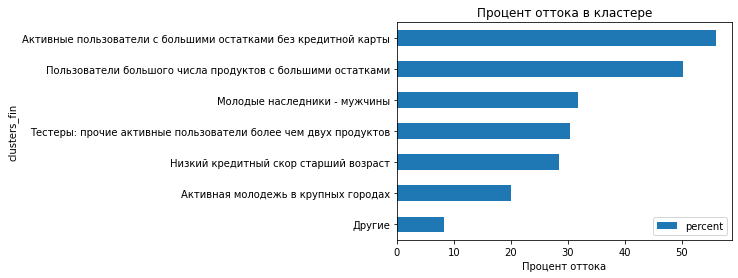

In [100]:
churn_data_fin.sort_values(by='percent').plot(kind='barh', stacked=False, x = 'clusters_fin', y = ['percent'])
plt.title('Процент оттока в кластере')
plt.xlabel('Процент оттока')
plt.show();


вариант автоматизации перебора по двум условиям на сегмент

In [118]:
#CODE REVIEW
conditions = (
    "credit_card==1",
    "age >= 50 and age <= 60",
    "products >= 3",
    "products <= 2",
    "last_activity == 1",
    "score > 780 and score < 890"
)

#CODE REVIEW
# два цикла - комбинация из 2 условий, нужно больше делаем больше вложенных циклов
def _block_calculation(df: pd.DataFrame, condition: str) -> dict:
    return {
        "conditions": condition,
        "churn": df["churn"].mean(),
        "amount": df.shape[0]
    }

def auto_segmentation(df: pd.DataFrame, conditions: list) -> pd.DataFrame:
    res = []

    for cond1 in conditions:

        # проверяем что таких условий еще нет
        if not cond1 in [r["conditions"] for r in res]:
            _partial_calc = _block_calculation(df=df.query(cond1), condition=cond1)
            res.append(_partial_calc)

        for cond2 in conditions:
            # нужно склеить два условия
            # склеиваем туда сюда, чтобы исключить дублирование =)
            cond1_cond2 = cond1 + " and " + cond2
            cond2_cond2 = cond2 + " and " + cond1

            # проверить что таких нет
            if not (cond1_cond2 in [r["conditions"] for r in res] or cond2_cond2 in [r["conditions"] for r in res])\
            and cond1 != cond2:
                if not df.query(cond1_cond2).empty:
                    _partial_calc = _block_calculation(df=df.query(cond1_cond2), 
                                                   condition=cond1_cond2)
                    res.append(_partial_calc)
    return pd.DataFrame(res).sort_values(by="churn", ascending=False)

In [122]:
#CODE REVIEW
df_segm = auto_segmentation(df=filtered_data, conditions=conditions)
df_segm.sort_values(by="churn", ascending=False).head(10)

,conditions,churn,amount
7,age >= 50 and age <= 60 and products >= 3,0.52740,292
2,credit_card==1 and products >= 3,0.47820,711
12,products >= 3 and last_activity == 1,0.47509,823
11,products >= 3,0.39517,1531
13,products >= 3 and score > 780 and score < 890,0.35916,955
10,age >= 50 and age <= 60 and score > 780 and score < 890,0.32847,959
9,age >= 50 and age <= 60 and last_activity == 1,0.32609,920
18,last_activity == 1 and score > 780 and score < 890,0.29522,2720
6,age >= 50 and age <= 60,0.26471,1768
17,last_activity == 1,0.24487,5215


<hr style="border: 2px solid green;" />

### Выводы о рисковых сегментах и их описание
В ходе исследования были выделены следующие рисковые сегменты:
- <b>Активные пользователи c большими остатками на счету без кредитной карты</b>
    - объем сегмента 704 записи, уровень оттока 55.97% (самый высокий)
    - основные признаки: баланс на счету выше 700 тысяч рублей, нет кредитной карты, активно пользуются банковскими продуктами. В среднем это люди скорее старшего возраста (средний возраст в группе 45.8 лет), средние баллы капитала/недвижимости 4,2 (обеспеченные), среднее пользование банковскими продуктами 2.3, средний баланс чуть менее 2 млн, средний доход 168 тысяч.
    - <b>Рекомендации по снижению оттока:</b> активно предлагать кредитные продукты, запустить программу финансовой грамотности, помогающую клиентам, имеющим свободные финансы, нарастить свой капитал, запустить и предлагать инвестиционные продукты на эту группу
- <b>Пользователи большого числа продуктов c большими остатками</b>
    - объем сегмента 547 записей, уровень оттока 50.27% (второй по величине)
    - основные признаки: пользователи трех и более продуктов, остаток на счету более 700 тысяч. В среднем это также люди более старшего возраста (средний 45,7%), часто пользующиеся кредитной картой (процент проникновения продукта 63%),  средние баллы капитала/недвижимости 4,1 (обеспеченные), средний баланс чуть менее 2 млн, средний доход чуть более 160 тысяч.
    - <b>Рекомендации по снижению оттока:</b> провести дополнительное исследования того, какой конкретный продукт или продукты из портфеля не устраивают высокодоходных клиентов и реструктуризировать эти продукты, также запустить программу финансовой грамотности, помогающую клиентам, имеющим свободные финансы, нарастить свой капитал, запустить и предлагать инвестиционные продукты на эту группу
- <b>Молодые наследники - мужчины</b>
    - объем сегмента 809 записей, уровень оттока 31.7% (средневысокий)
    - основные признаки: мужчины младше 38 лет, имеющие более 3 баллов недвижимости/капитала. В среднем это мужчины 31,8 лет, со значительным процентом пользования кредитными картами (более 76%), средний балл по группе капитала/недвижимости 4,6 (высокообеспеченные), средний баланс около 800 тысяч, средний доход 119 тысяч.
    - <b>Рекомендации по снижению оттока:</b> разработать специальные условия по кредитам, вкладам или другим продуктам, учитывая амбициозность и требовательность этой группы клиентов, также провести глубинное исследование потребностей клиентов этой группы. Возможно, требуется адаптация бизнес-инструментов банка к современным реалиям (поскольку известно, что более молодые клиенты банка демонстрируют более высокий отток), разработка мобильного приложения, чат-бота и других удобных схем взаимодействия. Учитывая невысокий средний доход и невысокий остаток на счету, эту группу нельзя назвать людьми с обложки Forbes (30 до 30), возможно, стоит провести вебинары по налогам и запустить курсы по увеличению дохода с использованием недвижимости.
- <b>Тестеры: прочие активные пользователи более чем двух продуктов</b>
    - объем сегмента 297 записей, уровень оттока 30.3% (средневысокий)
    - основные признаки: активные пользователи трех и более продуктов. В среднем это клиенты 42 лет, с существующими, но небольшими остатками на счету (среднее значение около 360 тысяч), средним доходом около 100 тысяч, со средний процентом пользования кредитными картами (около 41%), около 3 баллов недвижимости/капитала (достаточно обеспеченные), с довольно низким средним кредитным скором - 836.
    - <b>Рекомендации по снижению оттока:</b> проверить, новые ли это клиенты у этого банка, если да, предлагать особые условия для теста. Активно продвигать пользование кредитными картами в рамках экосистемы, разработать выгодную схему пакетного использования продуктов. Оказывать консультативную помощь в управлении финансами. Также провести глубинное исследование продуктового портфеля, чтобы узнать, какой конкретный продукт или продукты из портфеля не устраивают клиентов и реструктуризировать эти продукты.
- <b>Клиенты, завершающие карьеру, с низким кредитным скором</b>
    - объем сегмента 613 записей, уровень оттока 28.3% (средневысокий)
    - основные признаки: клиенты возрастной группы 50-60 лет с кредитным скором 780-890 баллов. Средний остаток на счетах чуть более полумиллиона, средний доход около 100 тысяч, средний возраст около 55 лет, среднеобеспеченные (около 3 баллов капитала/недвижимости), около 40% пользующихся кредитной картой, в среднем 1,9 продуктов.
    - <b>Рекомендации по снижению оттока:</b> активно продвигать кредитные карты, предлагать помощь в управлении финансами - повышать финансовую грамотность и активнее рекомендовать подходящие финансовые продукты, разработать персонализированные предложения для этой возрастной категории, возможно - пересмотреть кредитные предложения с учетом владения недвижимостью. Провести глубинное исследование потребностей этой группы клиентов. 
- <b>Активная молодежь в крупных городах</b>
    - объем сегмента 474 записи, уровень оттока 20% (пограничный)
    - основные признаки: клиенты возрастной группы моложе 32 лет в Ярославле и Ростове, активно пользующаяся продуктами. Средний возраст 27,6 лет, средний остаток на счетах низкий, около 200 тысяч, средний доход около 110 тысяч низкообеспеченные (1,7 баллов капитала/недвижимости), активно пользующиеся кредитной картой (84%), в среднем 1,5 продукта (от 1 до 2).
    - <b>Рекомендации по снижению оттока:</b> изучить предложения конкурентов в Ростове и Ярославле, сформировать уникальное торговое предложение для этой группы. Возможно, требуется адаптация бизнес-инструментов банка к современным реалиям (поскольку известно, что более молодые клиенты банка демонстрируют более высокий отток), разработка мобильного приложения, чат-бота и других удобных схем взаимодействия. Запустить семинары по инвестированию и наращиванию капитала. Активно предлагать инвестиционные продукты в этой группе, можно предлагать высокодоходные инвестиционные продукты с низкой стоиомстью входа и высокими рисками, учитывая небольшую капитализацию и доходы этой группы клиентов.
- <b>Другие</b>
    - основной сегмент клиентов, за исключением описанных групп, объемом 6530 записей, демонстрирующий низкую отточность в 8.1% 

In [101]:
filtered_data.shape

(9974, 20)

### Другие общие выводы
Следует также особое внимание уделить исследованию следующей группы пользователей:
- клиенты с 4 продуктами, группа объемом 474 записи, с оттоком 63,29%
- характеристики группы: преимущественно в Ярославле, очень активные пользователи, средневысокий кредитный скор (878) средний возраст 39.7, преимущественно мужчины, 4.1 балла собственности, 68% пользования кредитными картами, в среднем более миллиона остатка на счету, в среднем 148 тысяч оценочного дохода.
- Рекомендуется проверить и реструктуризовать продукт, которым вызывает наибольшие нарекания у этой группы клиентов. Вероятно, наилучший способ это выяснить – попросить этих пользователей оценить эти продукты по время использования.


<h2>Общие рекомендации для заказчика</h2>
Сделать выводы и написать рекомендации по работе с сегментами клиентов для маркетинга<br>
Фиксация конечного результата в формате презентации (pdf)

### Заключительные выводы для Метапромбанка:

1. Провести указанную работу с рисковыми сегментами, описанными здесь выше, и также в презентации

2. Дополнительные меры:
   - Наиболее рисковый сегмент: Клиенты с 4 продуктами, в основном в Ярославле, молодые (средний возраст 39,7 лет), активные, с высоким кредитным рейтингом и уровнем equity. Этот сегмент демонстрирует значительный отток, особенно среди клиентов с высокими балансами и доходами.
   - Самый стабильный сегмент: Клиенты с 2 продуктами, среднеактивные, средний возраст 41 год, имеющие средний кредитный рейтинг и уровень equity.

3. Влияние количества продуктов на удержание клиентов:
   - Один продукт: Показывают высокую стабильность, однако у клиентов с одним продуктом, особенно с более низкими балансами, наблюдается больший риск оттока.
   - Два продукта: высокая стабильность
   - Три продукта: Сегмент с малым оттоком, пограничный.
   - Четыре продукта: Самый высокий уровень оттока, особенно среди молодых клиентов с высоким балансом и доходом.
3. Проблемы с балансом:
   - Более высокие балансы у клиентов с четырьмя продуктами коррелируют с повышенным уровнем оттока. Это указывает на возможные недостатки в предложениях или в управлении высокобалансными счетами.

### Рекомендации:

1. Реализация стратегии персонализации:
   - Младшие клиенты: Разработать специальные предложения для молодежи, особенно для тех, кто использует четыре продукта, включающие более гибкие продукты финансирования и инвестирования.
   - Старшие клиенты: Провести детальный анализ потребностей старших клиентов, чтобы обеспечить более тщательно настроенные услуги, способствующие увеличению их удержания.
2. Кредитные карты:
   - Динамика использования кредитных карт показывает, что у клиентов с тремя продуктами - минимальное использование, что может говорить о потенциале для продвижения кредитных продуктов в этой группе.
   - Для клиентов, которые редко используют кредитные карты, стоит запустить программы, которые подчеркивают преимущества и удобство использования кредитных карт в сочетании с другими банковскими продуктами, поскольку использование кредитных карт понижает риск ухода из банка
3. Управление балансом:
   - Статистически значимые различия в балансах между группами с оттоком и без указывают на необходимость разработки стратегий для управления большими остатками на счетах, возможно, через инвестиционные продукты или льготные условия хранения средств
4. Предоставлять дополнительную поддержку и стимулы для клиентов с 3 и более продуктами

<h2>Итоговые рекомендации для презентации</h2>

<h3>Признаки</h3>

- Количество банковских продуктов: Основной показатель, влияющий на отток и удержание клиентов. В частности, один и два продукта являются наиболее стабильными сегментами.<br>
- Использование кредитных карт: Динамика использования кредитных карт показывает, что у клиентов с тремя продуктами - минимальное использование, что может говорить о потенциале для продвижения кредитных продуктов в этой группе.<br>
- Возраст клиентов: Молодые клиенты склонны к большему риску и использованию разнообразных продуктов, что предполагает разработку персонализированных предложений для этой категории.<br>
- Баланс на счетах: Статистически значимые различия в балансах между группами с оттоком и без указывают на необходимость разработки стратегий для управления большими остатками на счетах, возможно, через инвестиционные продукты или льготные условия хранения средств.<br>

<h3>Рекомендации</h3>
- Предоставлять дополнительную поддержку и стимулы для клиентов с 3 и более продуктами, так как эта группа кажется более склонной к уходу.<br>
- Клиентам с одним продуктом стоит активнее предлагать кросс-продажи до двух продуктов. Владение двумя продуктами кажется оптимальным и способствует лояльности<br>
- Для клиентов, которые редко используют кредитные карты, стоит запустить программы, которые подчеркивают преимущества и удобство использования кредитных карт в сочетании с другими банковскими продуктами.<br>
- Молодые клиенты и клиенты с большими балансами требуют особого внимания в контексте риск-менеджмента и маркетингового взаимодействия, чтобы предложить им максимально выгодные условия и предотвратить отток<br>


